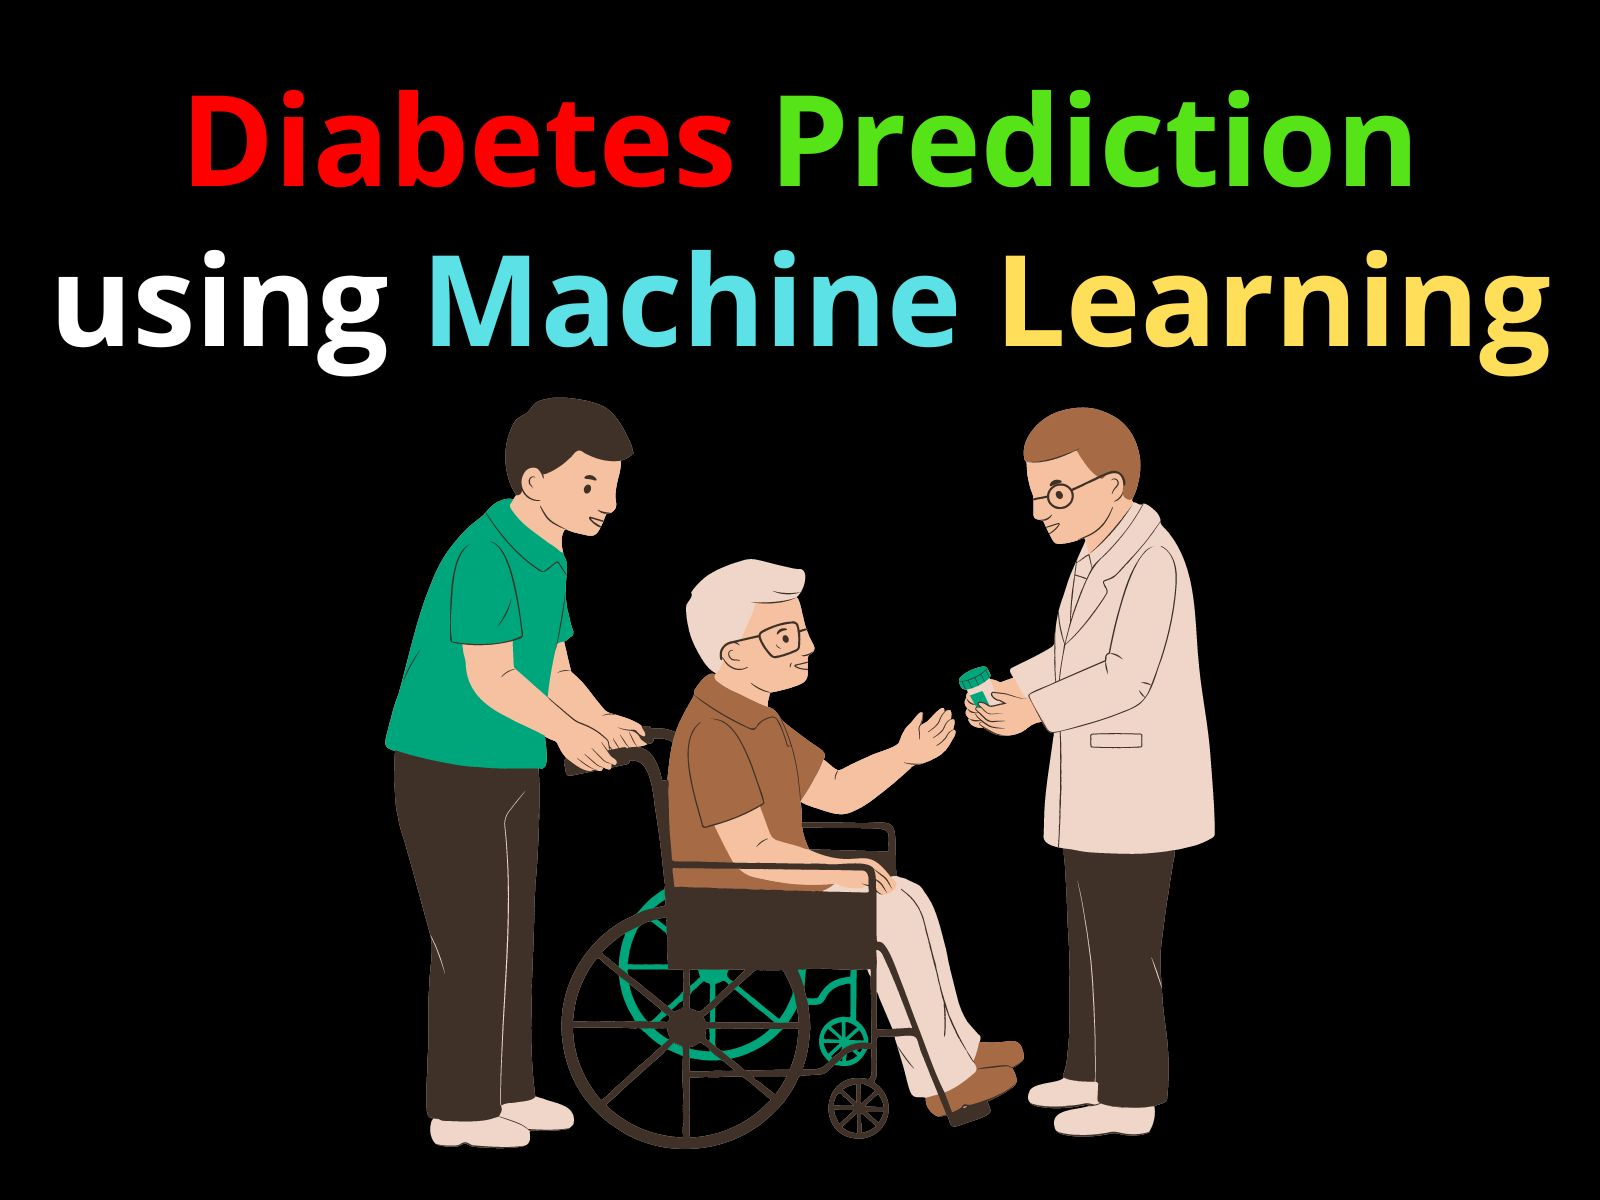

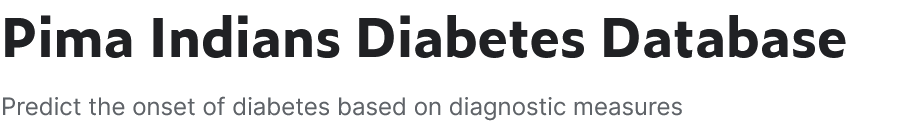

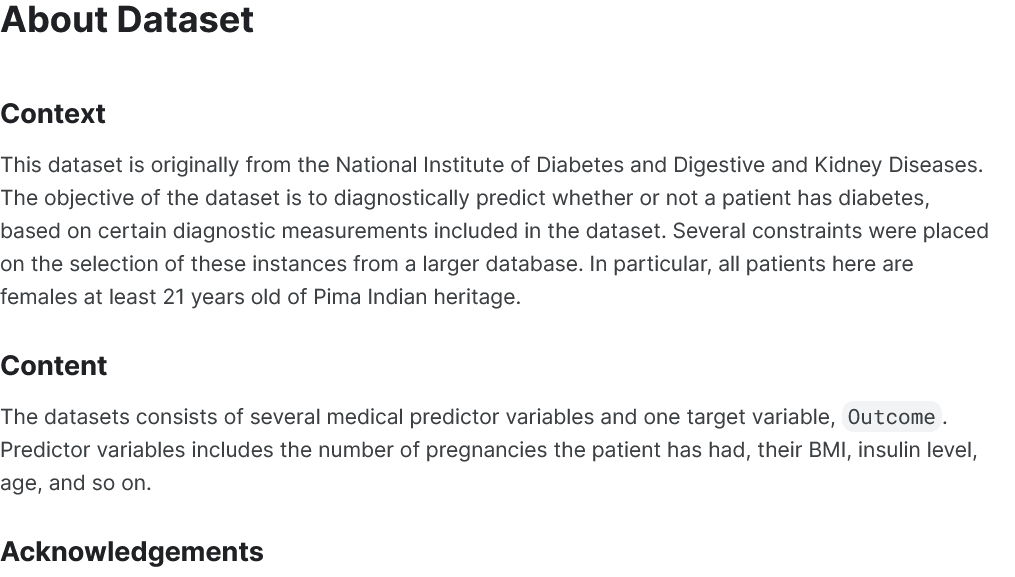

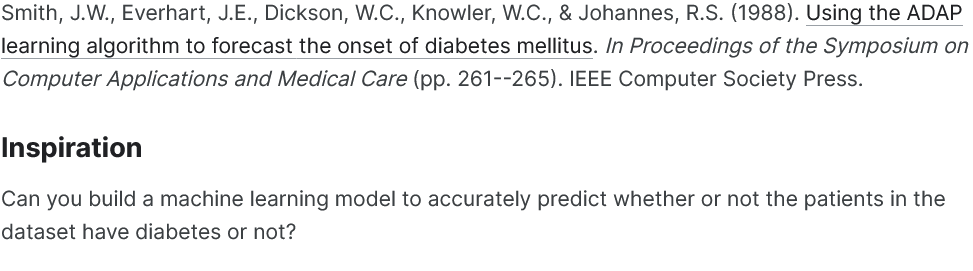

## Data Dictionary

#### Pregnancies

##### Description: Number of times the patient has been pregnant.
##### Type: Integer
##### Range: 0 to 17

#### Glucose

##### Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
##### Type: Integer
##### Range: 0 to 199 (Note: Values of 0 are usually missing or invalid, with typical values ranging from 70 to 200+)

#### BloodPressure

##### Description: Diastolic blood pressure (mm Hg).
##### Type: Integer
##### Range: 0 to 122 (Values of 0 are typically missing or invalid)

#### SkinThickness

##### Description: Triceps skin fold thickness (mm).
##### Type: Integer
##### Range: 0 to 99 (Values of 0 are usually missing or invalid)

#### Insulin

##### Description: 2-Hour serum insulin (mu U/ml).
##### Type: Integer
##### Range: 0 to 846 (Values of 0 are often missing or invalid)

#### BMI (Body Mass Index)

##### Description: Body mass index (weight in kg/(height in m)^2).
##### Type: Float
##### Range: 0.0 to 67.1

#### DiabetesPedigreeFunction

##### Description: Diabetes pedigree function, which is a function that scores likelihood of diabetes based on family history.
##### Type: Float
##### Range: 0.078 to 2.42

#### Age

##### Description: Age of the patient (years).
##### Type: Integer
##### Range: 21 to 81

#### Outcome

##### Description: Class variable indicating if the patient has diabetes (1) or not (0).
##### Type: Integer (Binary)
##### Values: 0 or 1

### Import Pre requisite Libraries

In [108]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.metrics import roc_auc_score , roc_curve

#### Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Dataset\\diabetes.csv')

In [3]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

### Exploratory Data Analysis

#### Shape

In [4]:
df.shape

(768, 9)

#### Insights : Dataset contains 768 records and 9 columns along with target variable

#### Size

In [5]:
df.size

6912

#### Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Insights : All features along with target variable are belongs to numerical data only

## Data Preprocessing

### 1.Handling Missing values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Insights : By visualization  , we are noticed there is no any missing values are not there

#### Check Describe of dataset

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Insights : We noticed , there is min value is having 0 (except Pregnancies ) . logically Its not possible , because if Glucose , BloodPressure , SkinThickness , Insulin and BMI is zero then human can not be survive . so we need to take care of it

##### Zero replaced by mean of that perticular feature

In [9]:
df['Glucose'] = np.where(df['Glucose'] == 0 , df['Glucose'].median() , df['Glucose'])
df['BloodPressure'] = np.where(df['BloodPressure'] == 0 , df['BloodPressure'].median() , df['BloodPressure'])
df['SkinThickness'] = np.where(df['SkinThickness'] == 0 , df['SkinThickness'].median() , df['SkinThickness'])
df['Insulin'] = np.where(df['Insulin'] == 0 , df['Insulin'].median() , df['Insulin'])
df['BMI'] = np.where(df['BMI'] == 0 , df['BMI'].median() , df['BMI'])

#### Describe after treatment

In [10]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Insights : Now min is not zero

In [11]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0     30.5  33.6   
1            1     85.0           66.0           29.0     30.5  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

#### Check Distribution Of Dataset

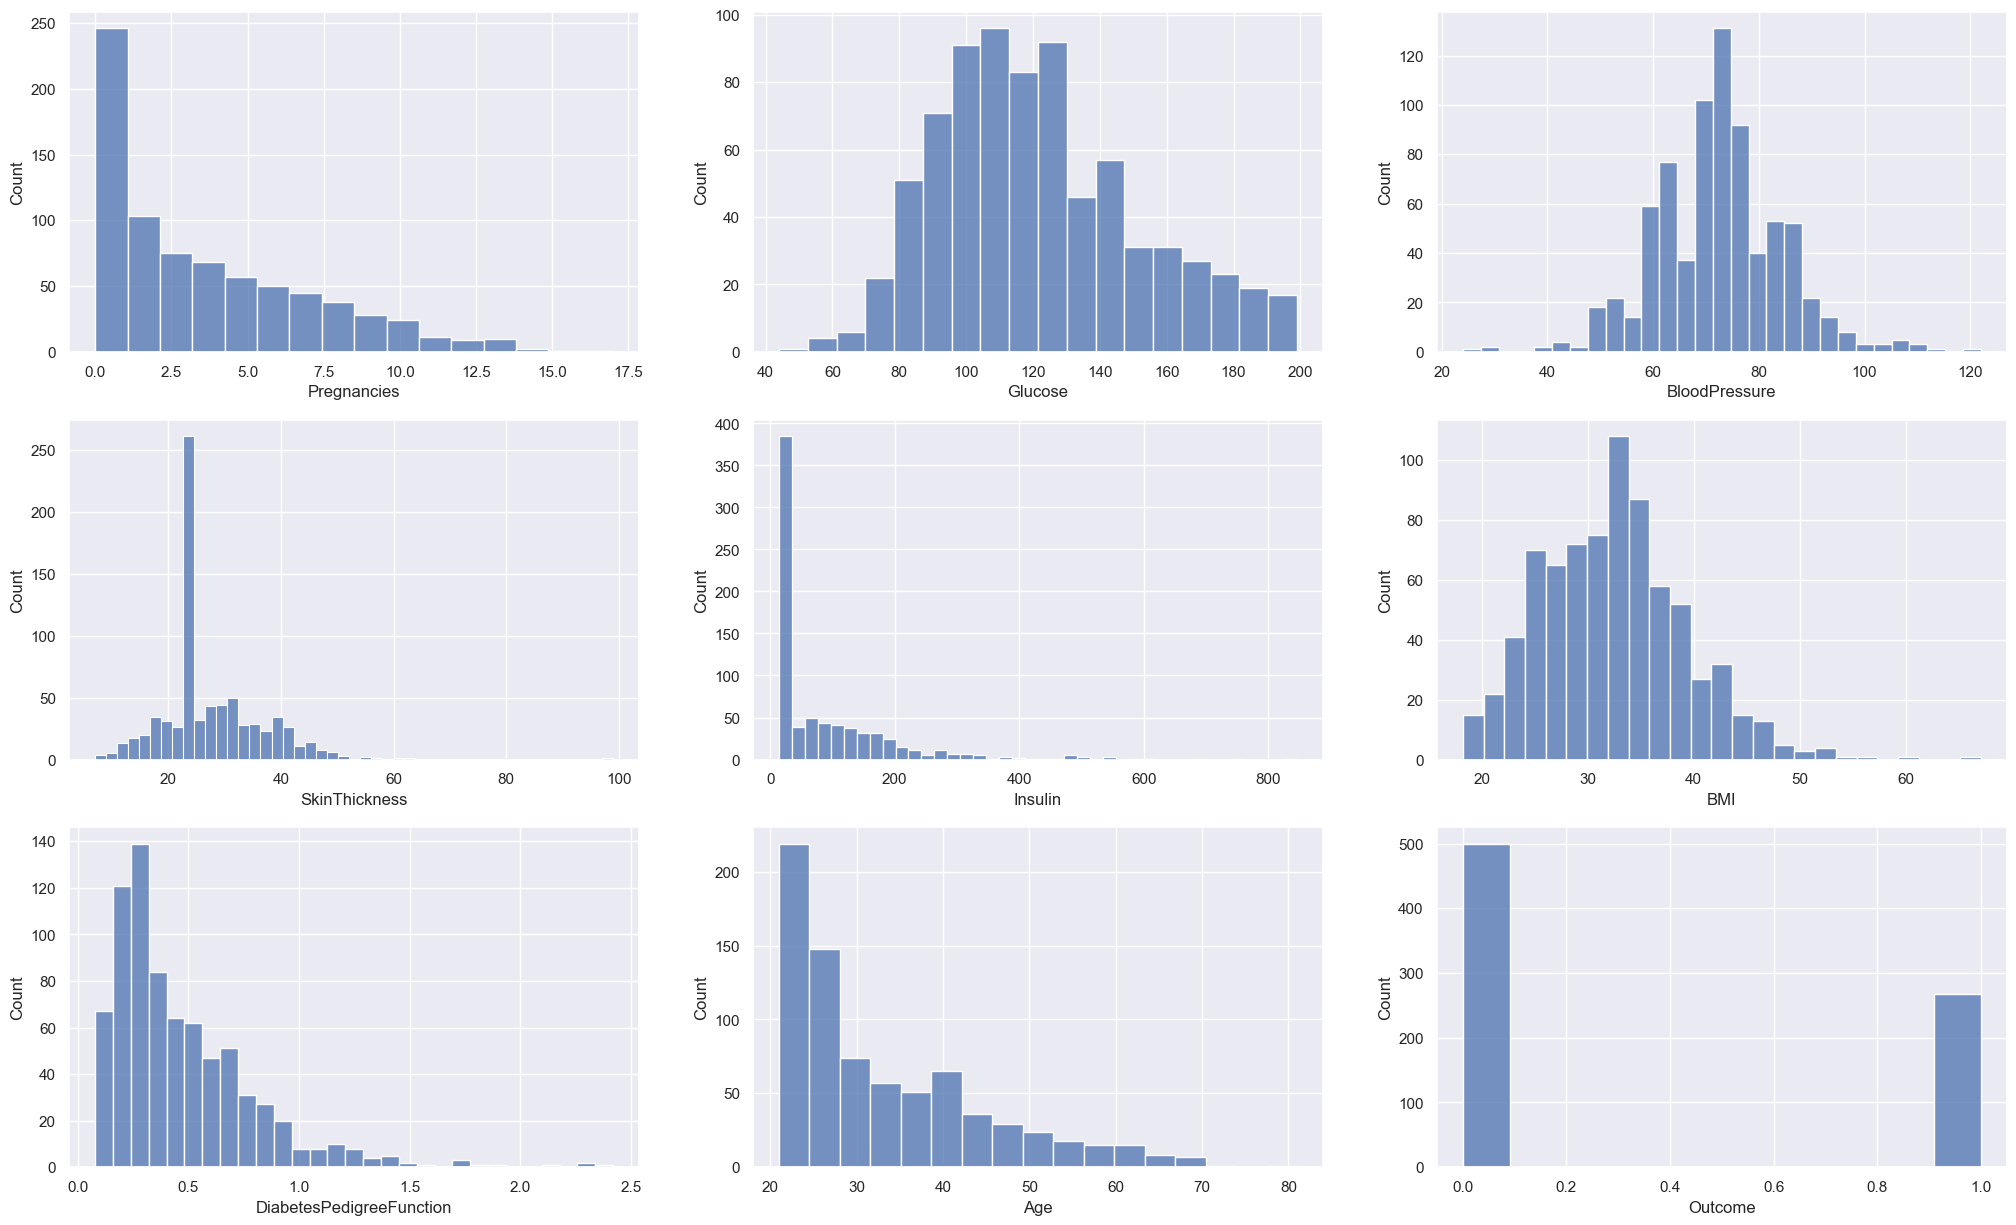

In [12]:
plt.figure(figsize = (25 , 15))

def check_distribution():
    
    i = 1
    
    for col in df:
        
        plt.subplot(3 , 3, i)
        
        
        sns.histplot(df[col])
        
        i = i + 1
        
        
check_distribution()

#### Insights : By the understanding of the data , no any single feature is not in normal distribution means data is not belongs to normal distribution . 

#### By Visualization , BloodPressure is looks like normal distribution but not exactly normally distributed . there is skewness

In [13]:
df['BloodPressure'].skew()

0.1418850201030565

#### Outcome is target variable so It is in classification

#### By Visualization , We get understand most of the data get rightly skewed or positive skew

#### Skewness

In [14]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.141885
SkinThickness               1.223057
Insulin                     2.693181
BMI                         0.601059
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

#### Visualization of Skewness

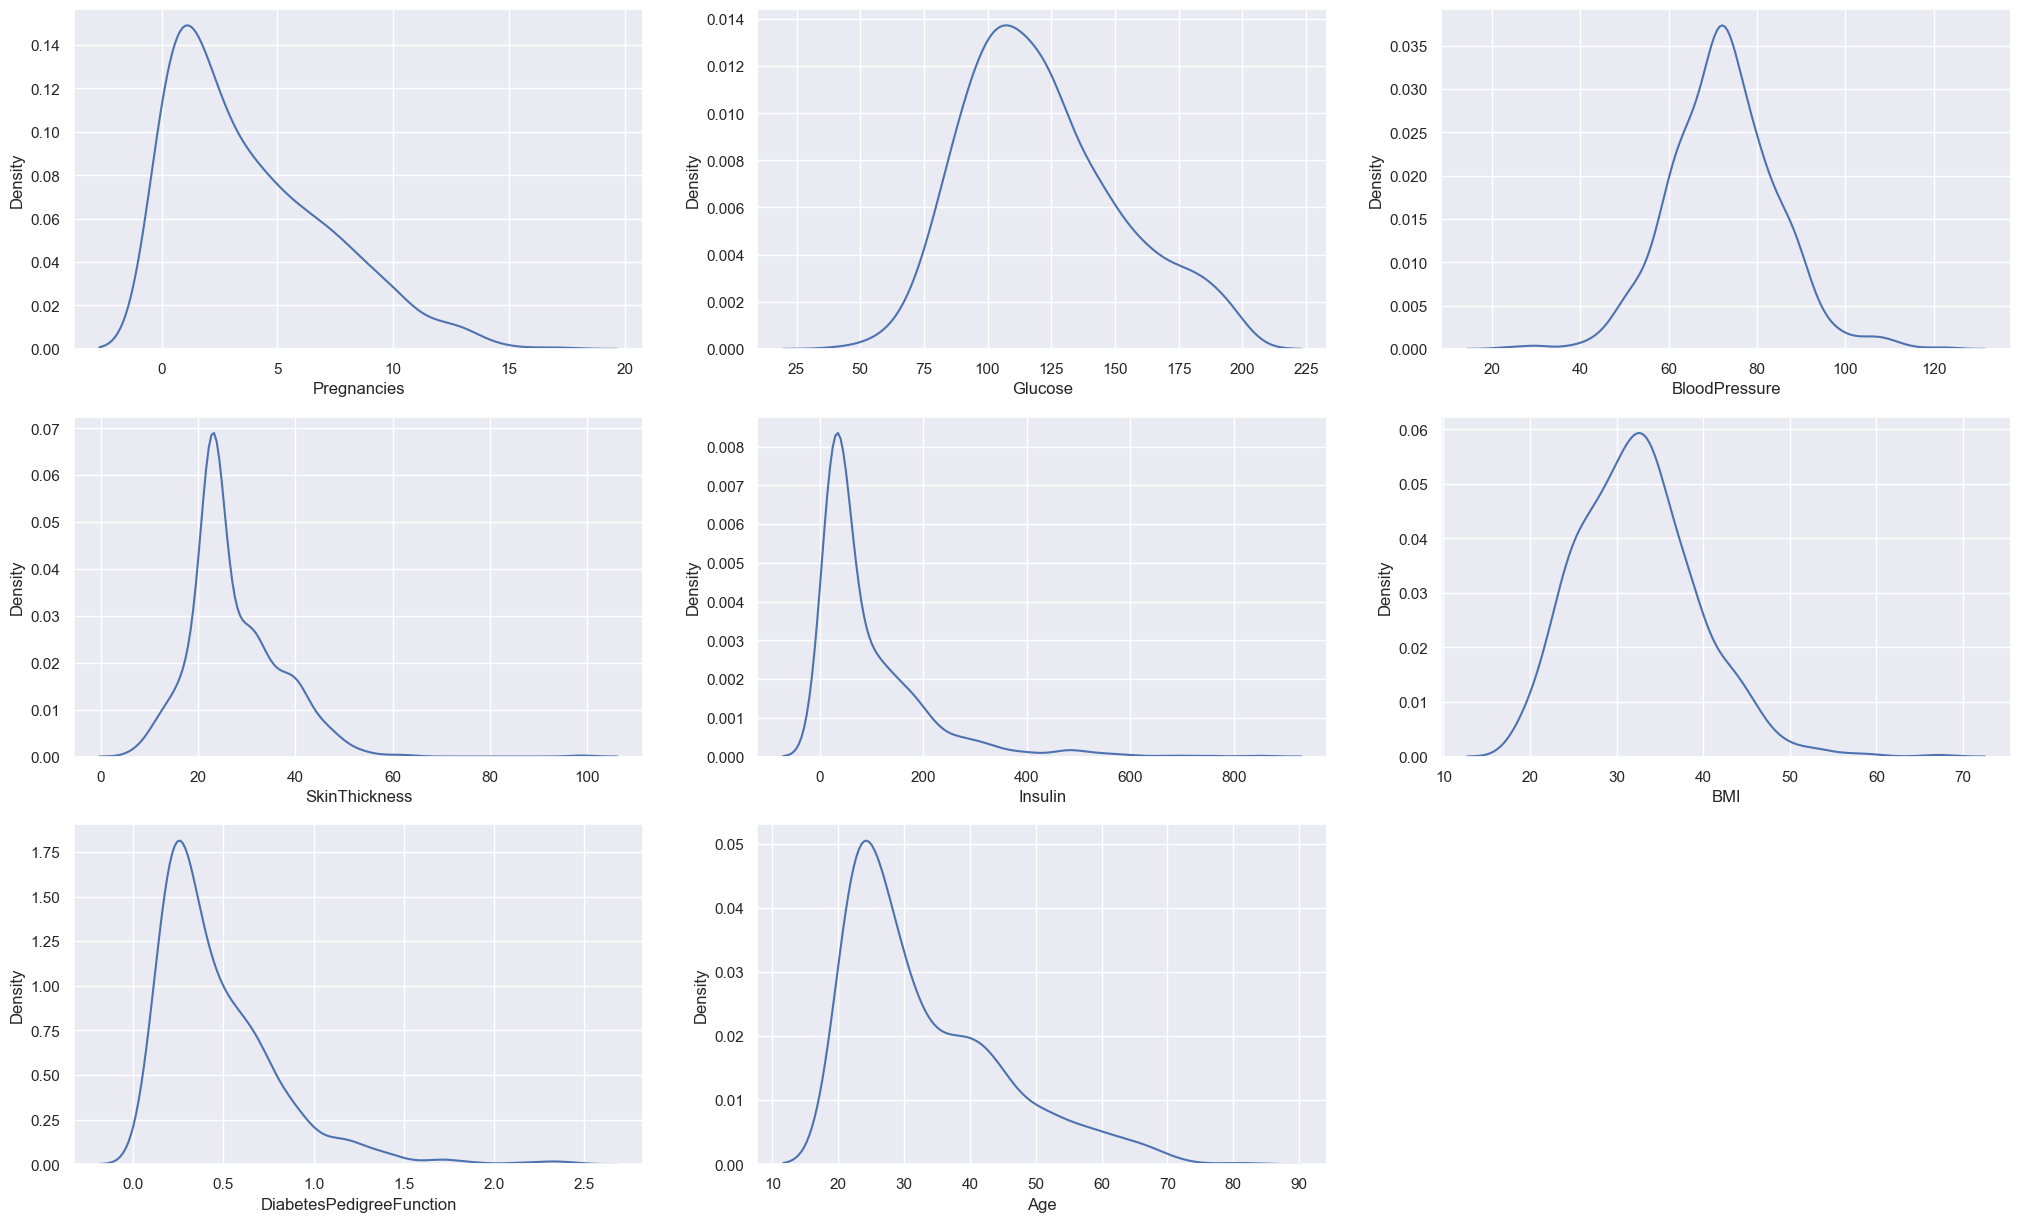

In [15]:
plt.figure(figsize = (25 , 15))

def check_skewness():
    
    i = 1
    
    for col in df.columns[:-1]:
        
        plt.subplot(3 , 3 , i)
        
        sns.kdeplot(df[col])
        
        i = i + 1
        
check_skewness()

#### Inisghts : By visualization , We get understand , almost every feature is rightly skewed

#### Bivariate Analysis

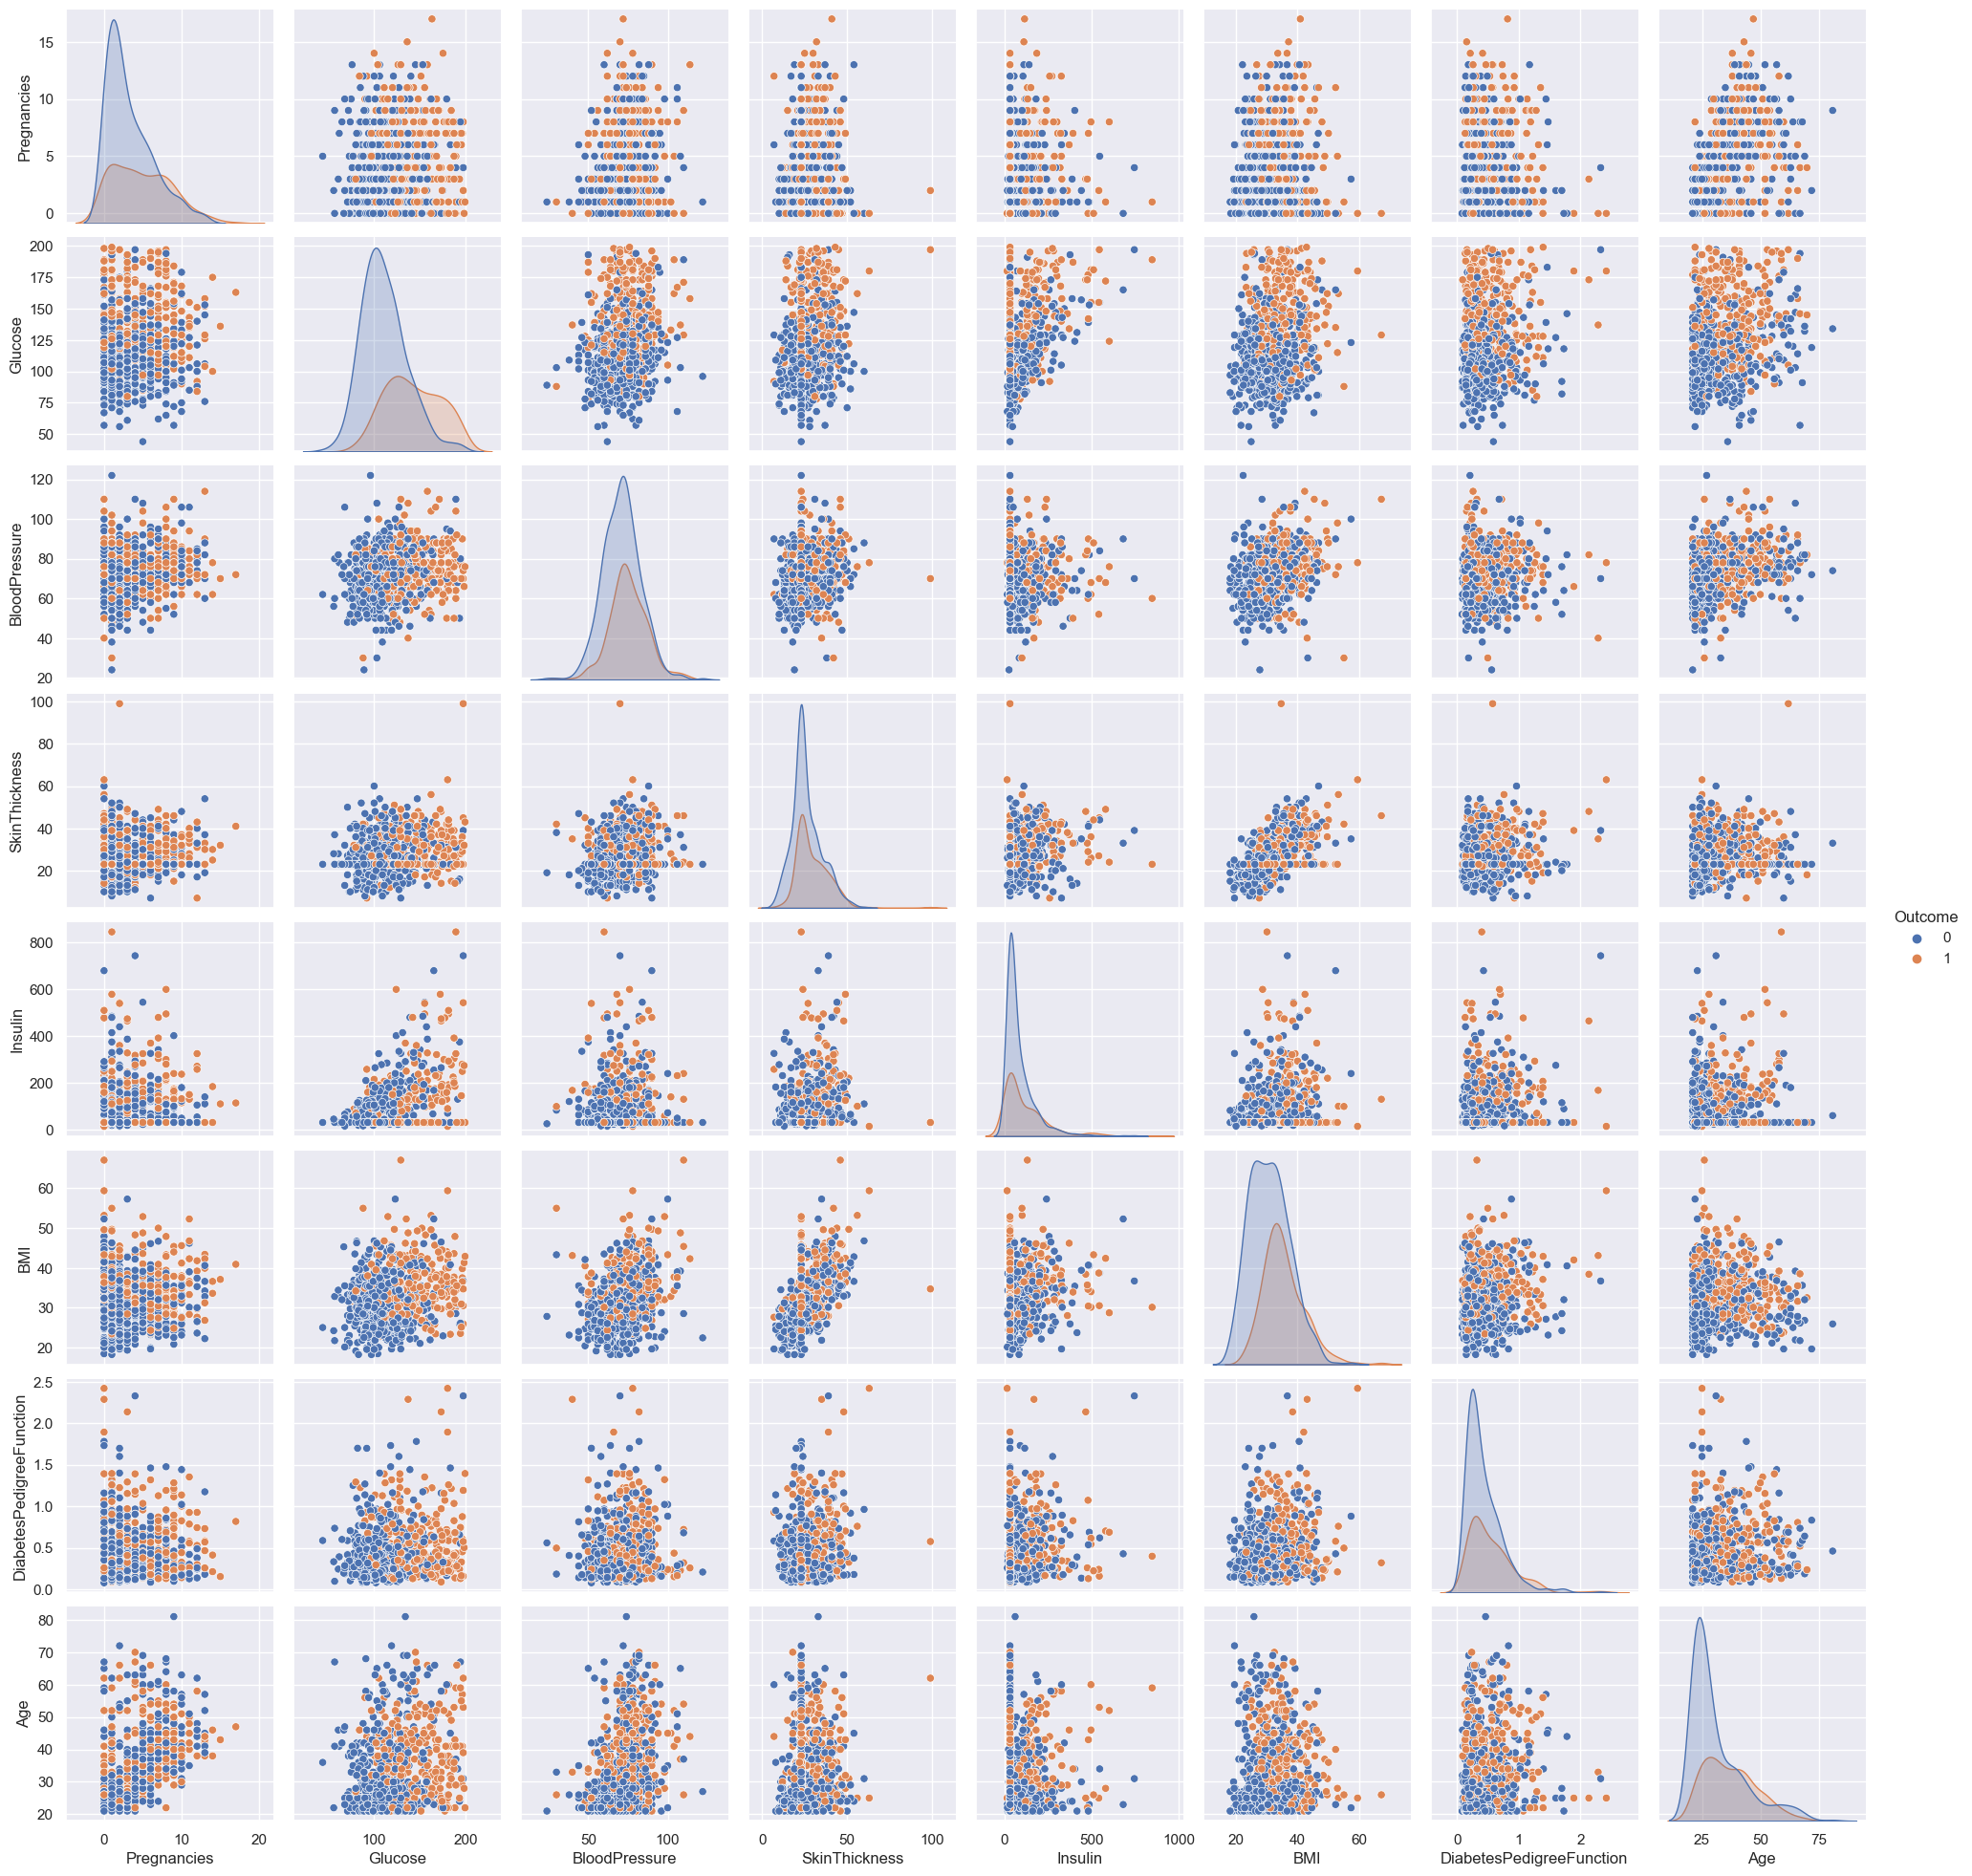

In [16]:
sns.pairplot(data = df ,hue='Outcome',diag_kind='kde' )
plt.show()

#### Visualization of Scatterplot

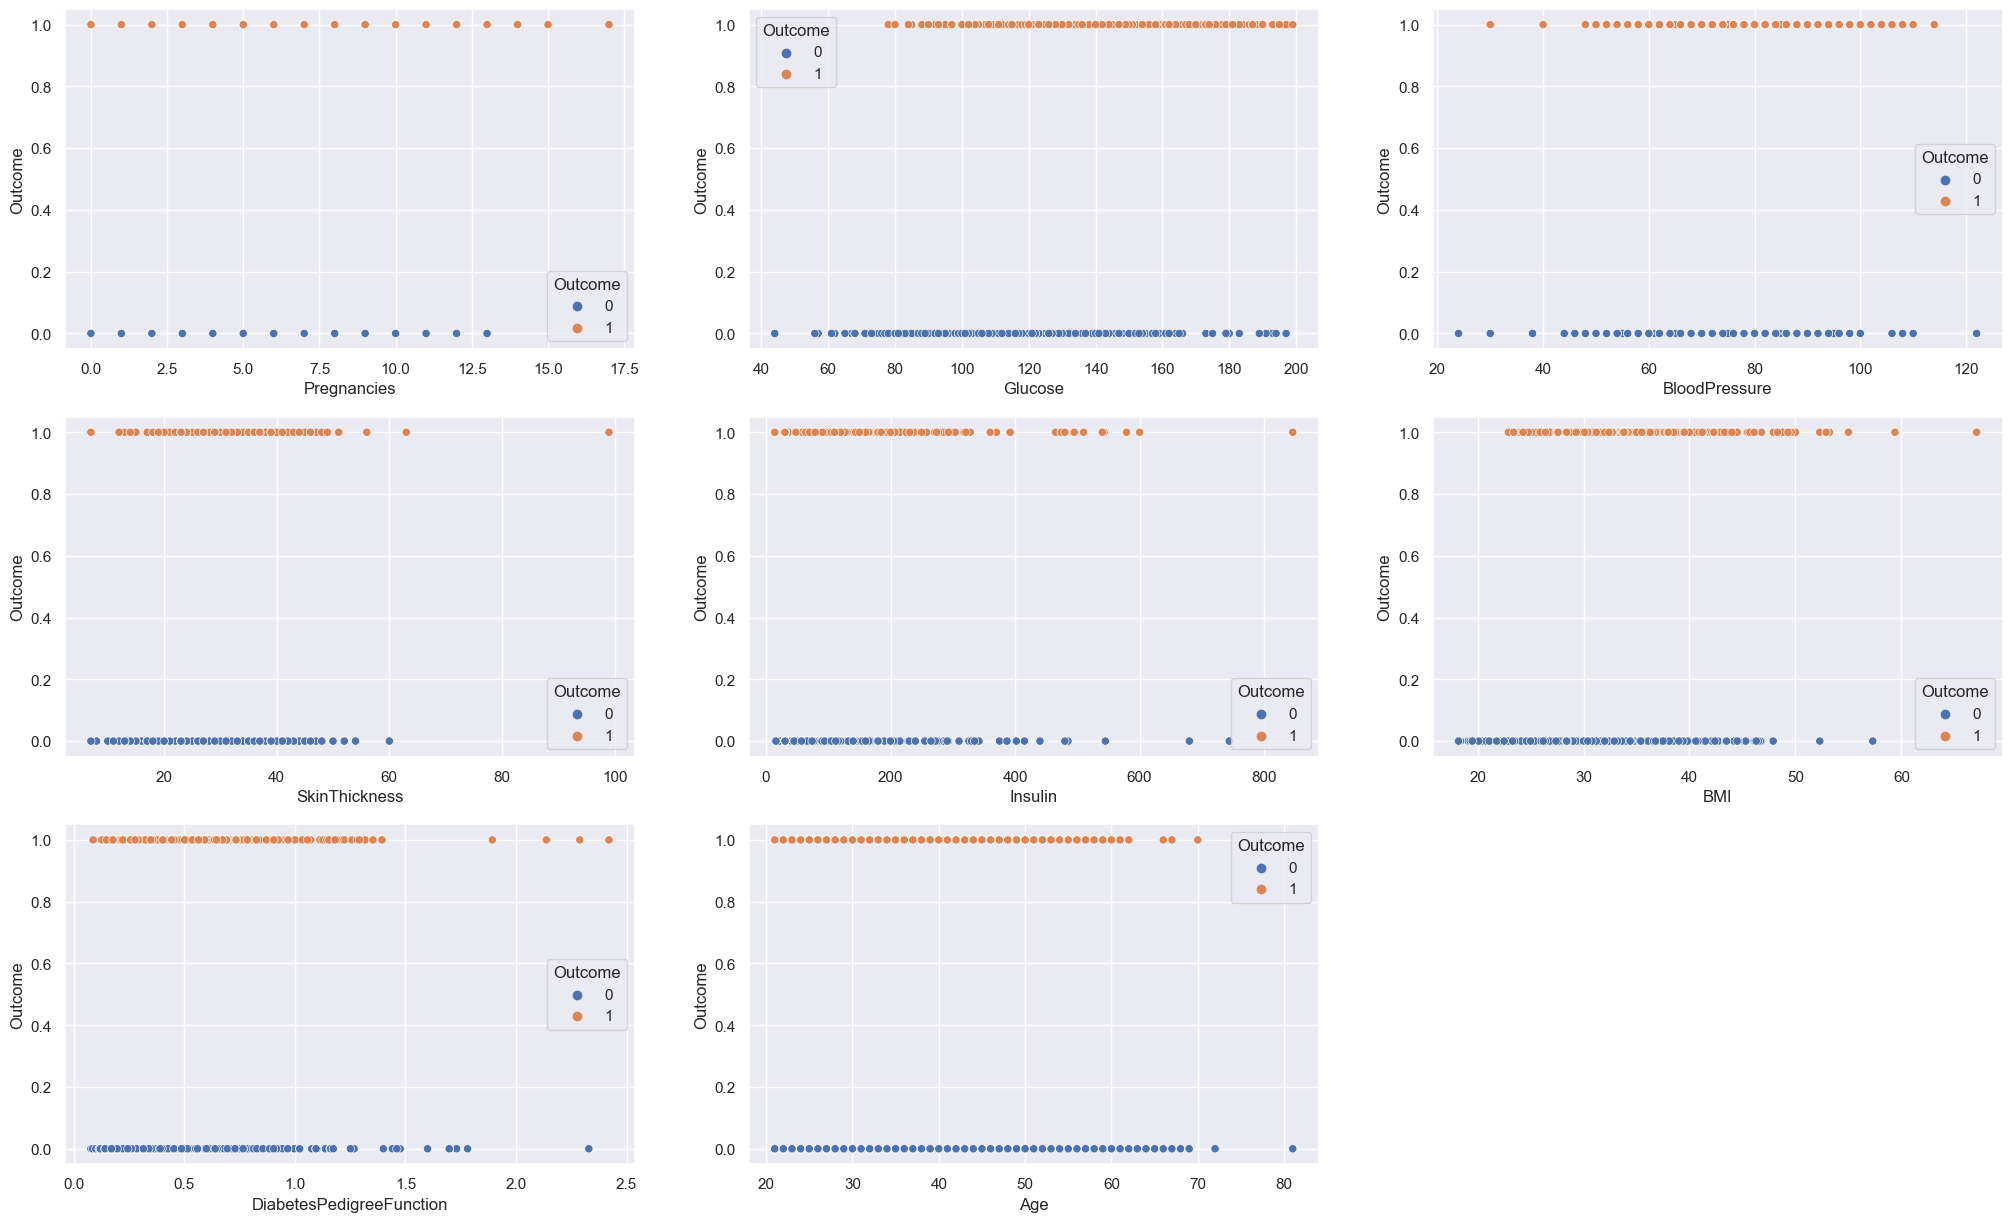

In [17]:
plt.figure(figsize = (25 , 15))
def visualization_scatterplot():
    
    i = 1
    
    for col in df.columns[:-1]:
        
        plt.subplot(3 , 3 , i)
        
        sns.scatterplot(data = df , x = col , y = 'Outcome', hue = 'Outcome')
        
        i = i + 1
        
visualization_scatterplot()

#### Positive linear relation between skinThickness vs BMI , DiabetesPedigreeFunction and  Age 

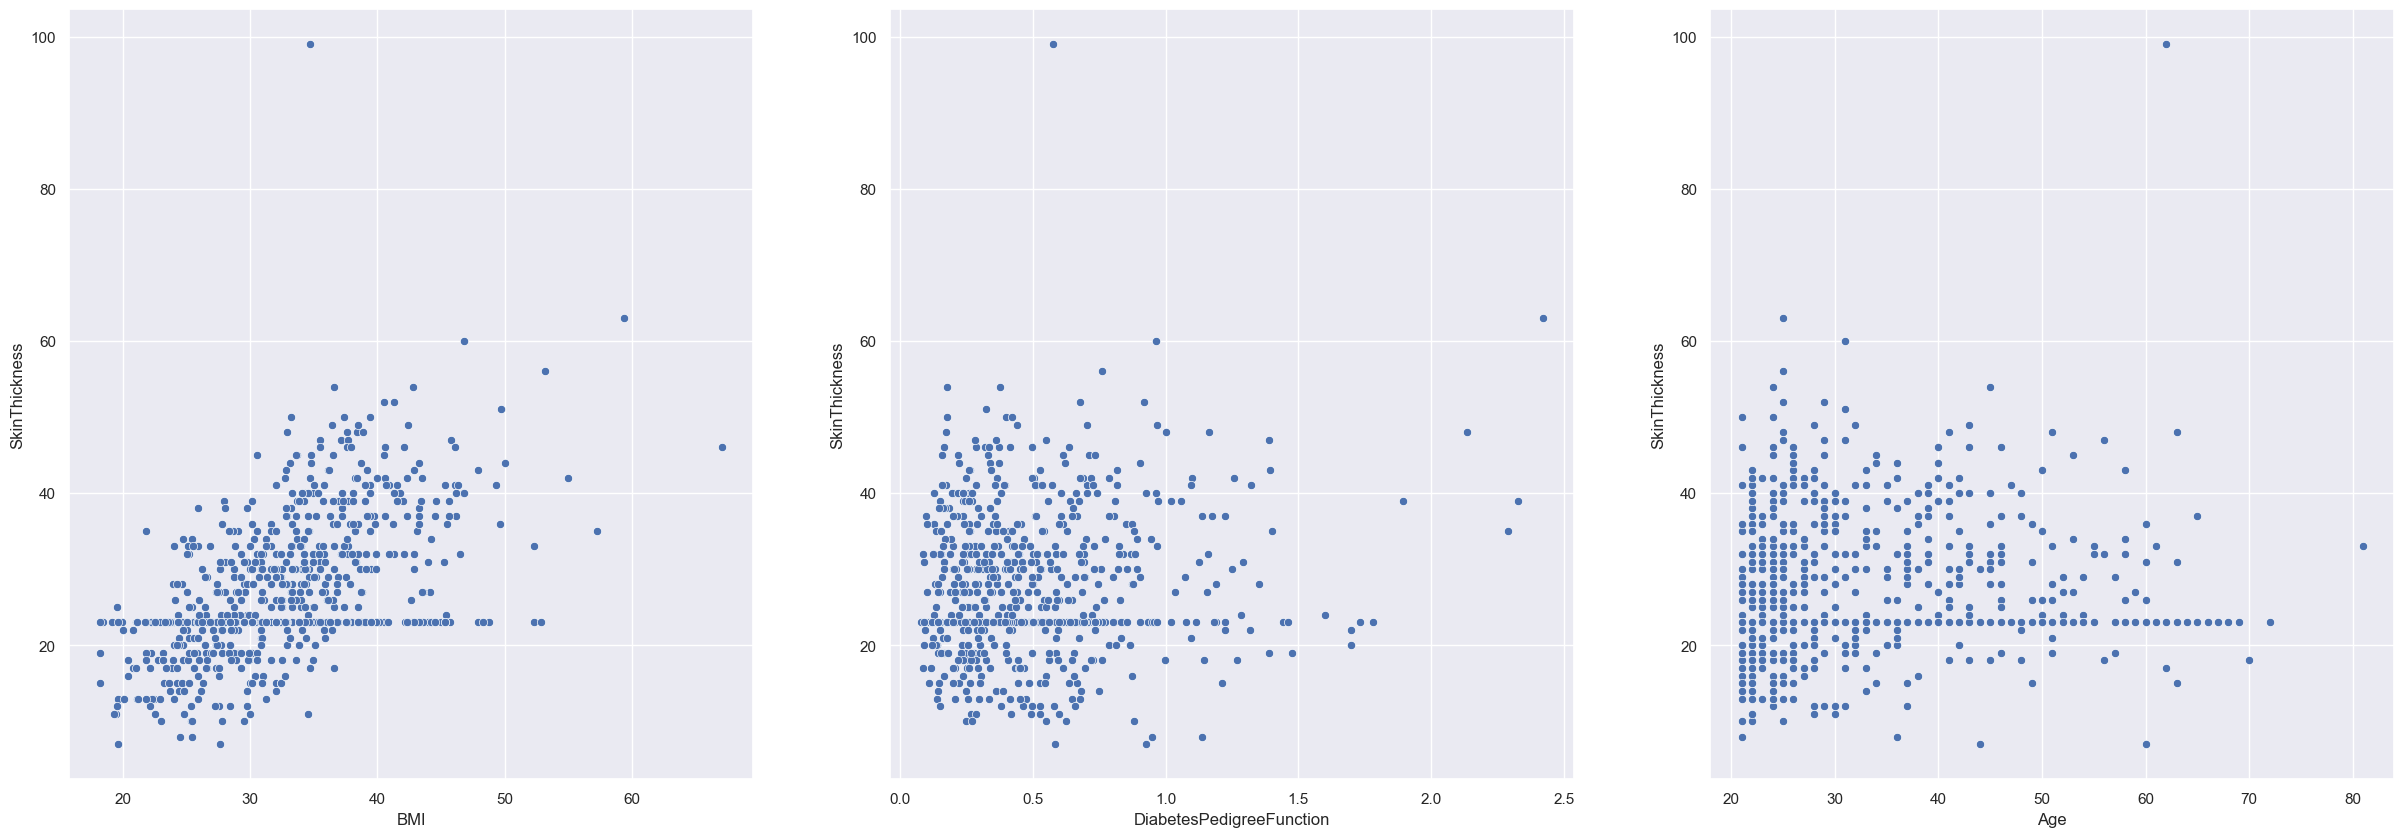

In [18]:
plt.figure(figsize = (30 , 10))

def scatter():
    
    i = 1
    
    for col in df[['BMI'  , 'DiabetesPedigreeFunction' , 'Age']]:
        
        plt.subplot(1 , 3 , i)
        
        sns.scatterplot(data = df , x = df[col] , y = df['SkinThickness'])
        
        i = i + 1
    
scatter()

#### 2.Handling Characters (Encoding)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### Insights : In our Dataset , no any single variable is object so we don't need any kind of encoding

### 3. Handling Outliers

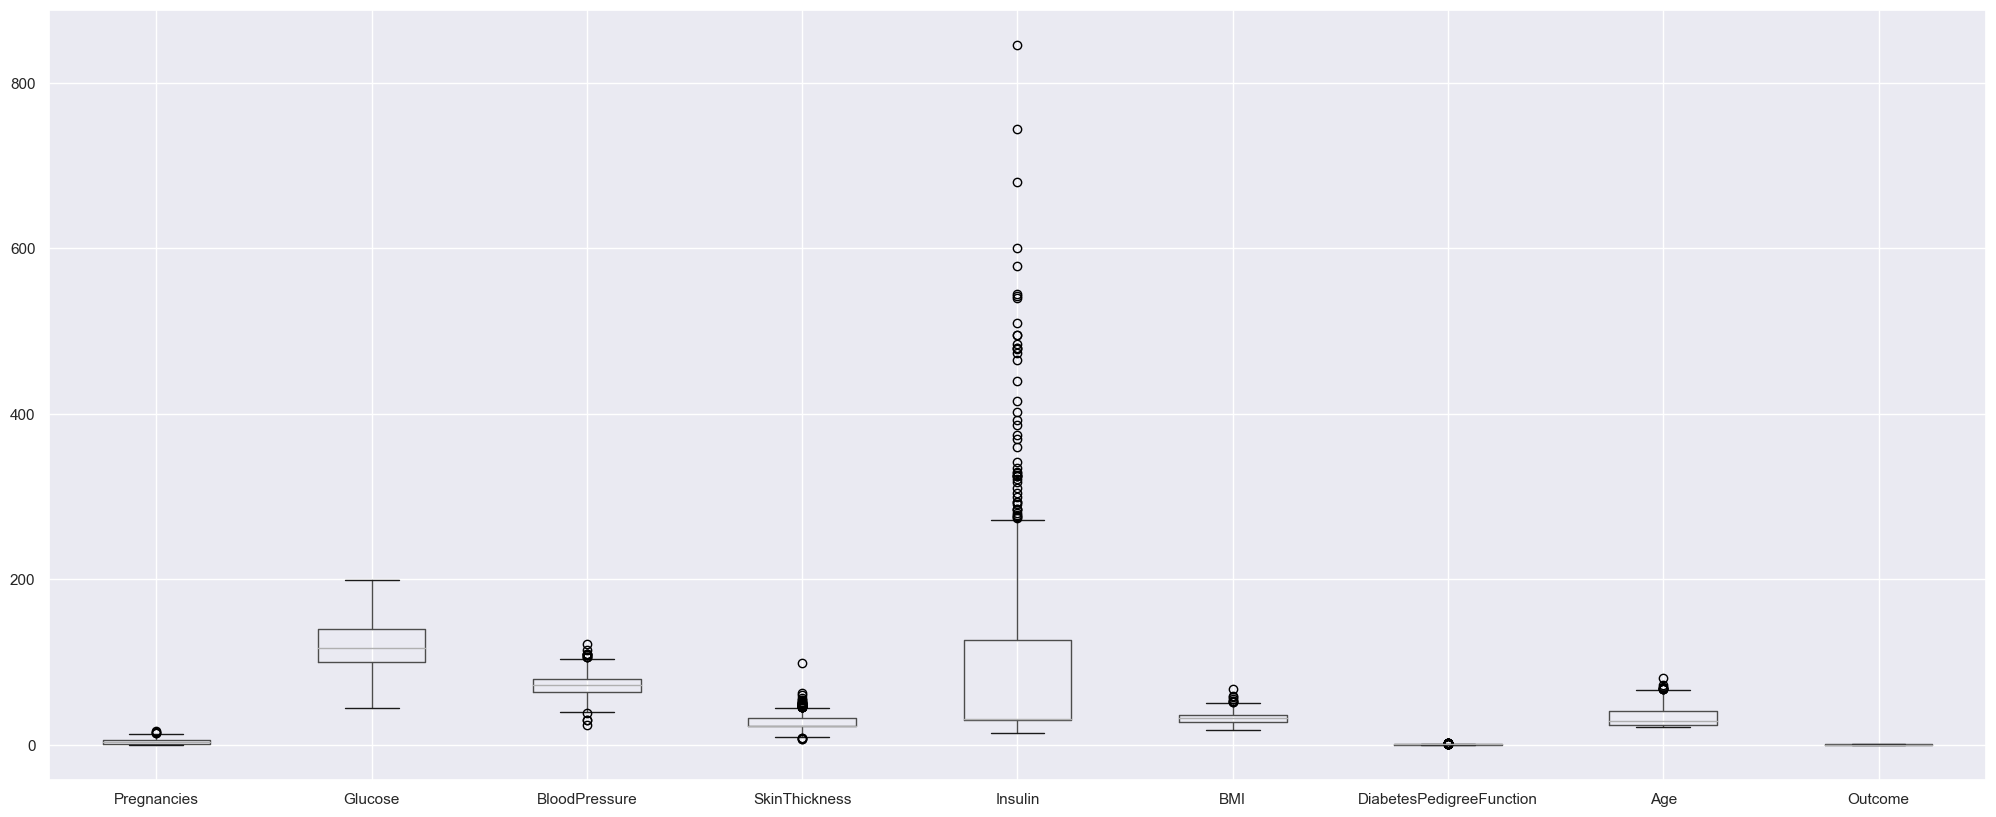

In [20]:
plt.figure(figsize = (25 , 10))
df.boxplot()
plt.show()

#### Check Outliers per feature

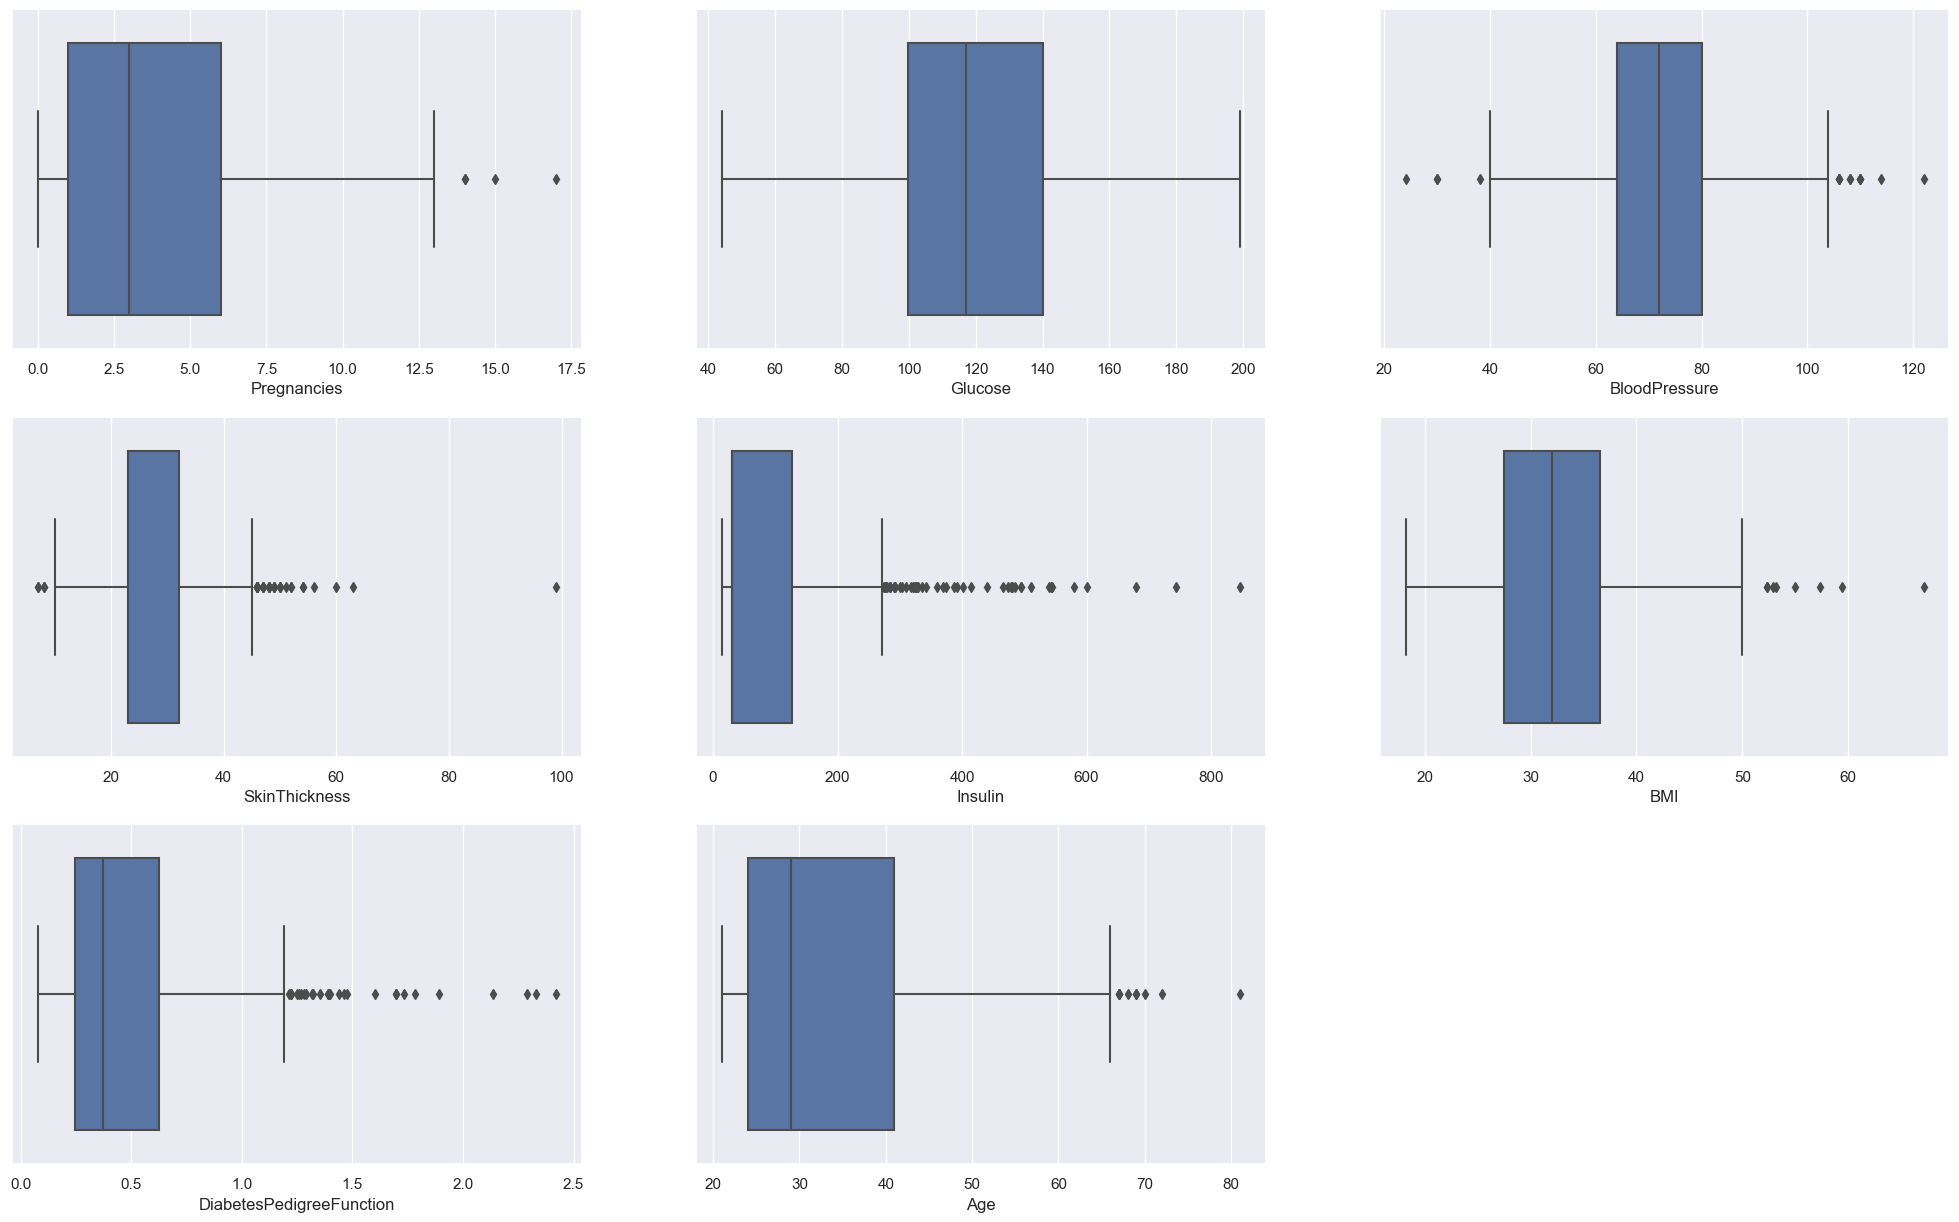

In [21]:
plt.figure(figsize = (25 , 15))

def outliers_detection():
    
    i = 1
    
    for col in df.columns[:-1]:
        
        plt.subplot(3 , 3 , i)
        
        sns.boxplot(data = df , x = col )
        
        i = i + 1
   
outliers_detection()

#### Insights : Except Glucose , Every variable has outliers 

#### Capping The Outliers

In [22]:
def capping_outliers():
    
    for col in df.columns[:-1]:
        
        Q1 = df[col].quantile(0.25)
        
        Q2 = df[col].quantile(0.50)
        
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        upper_limit = Q3 + (1.5 * IQR)
        
        lower_limit = Q1 - (1.5 * IQR)
        
        df[col] = np.where(df[col] > upper_limit ,  upper_limit , 
                np.where(df[col] < lower_limit , lower_limit , df[col]))
        
capping_outliers()

#### After Capping Outliers

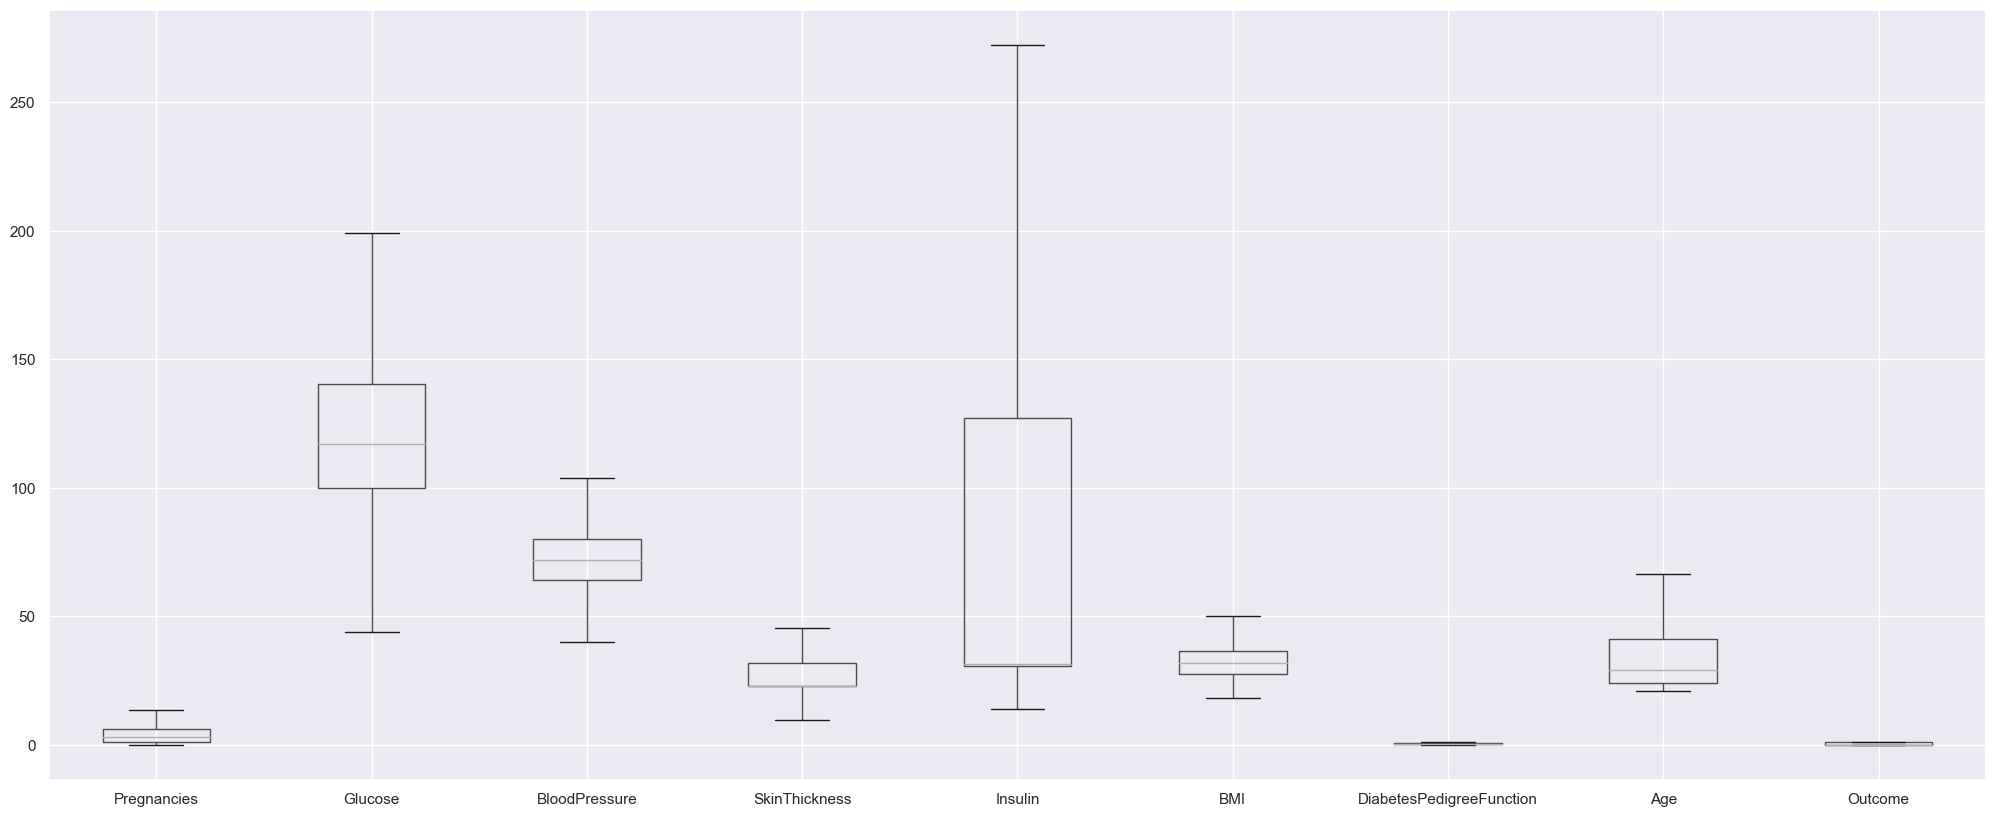

In [23]:
plt.figure(figsize = (25 , 10))
df.boxplot()
plt.show()

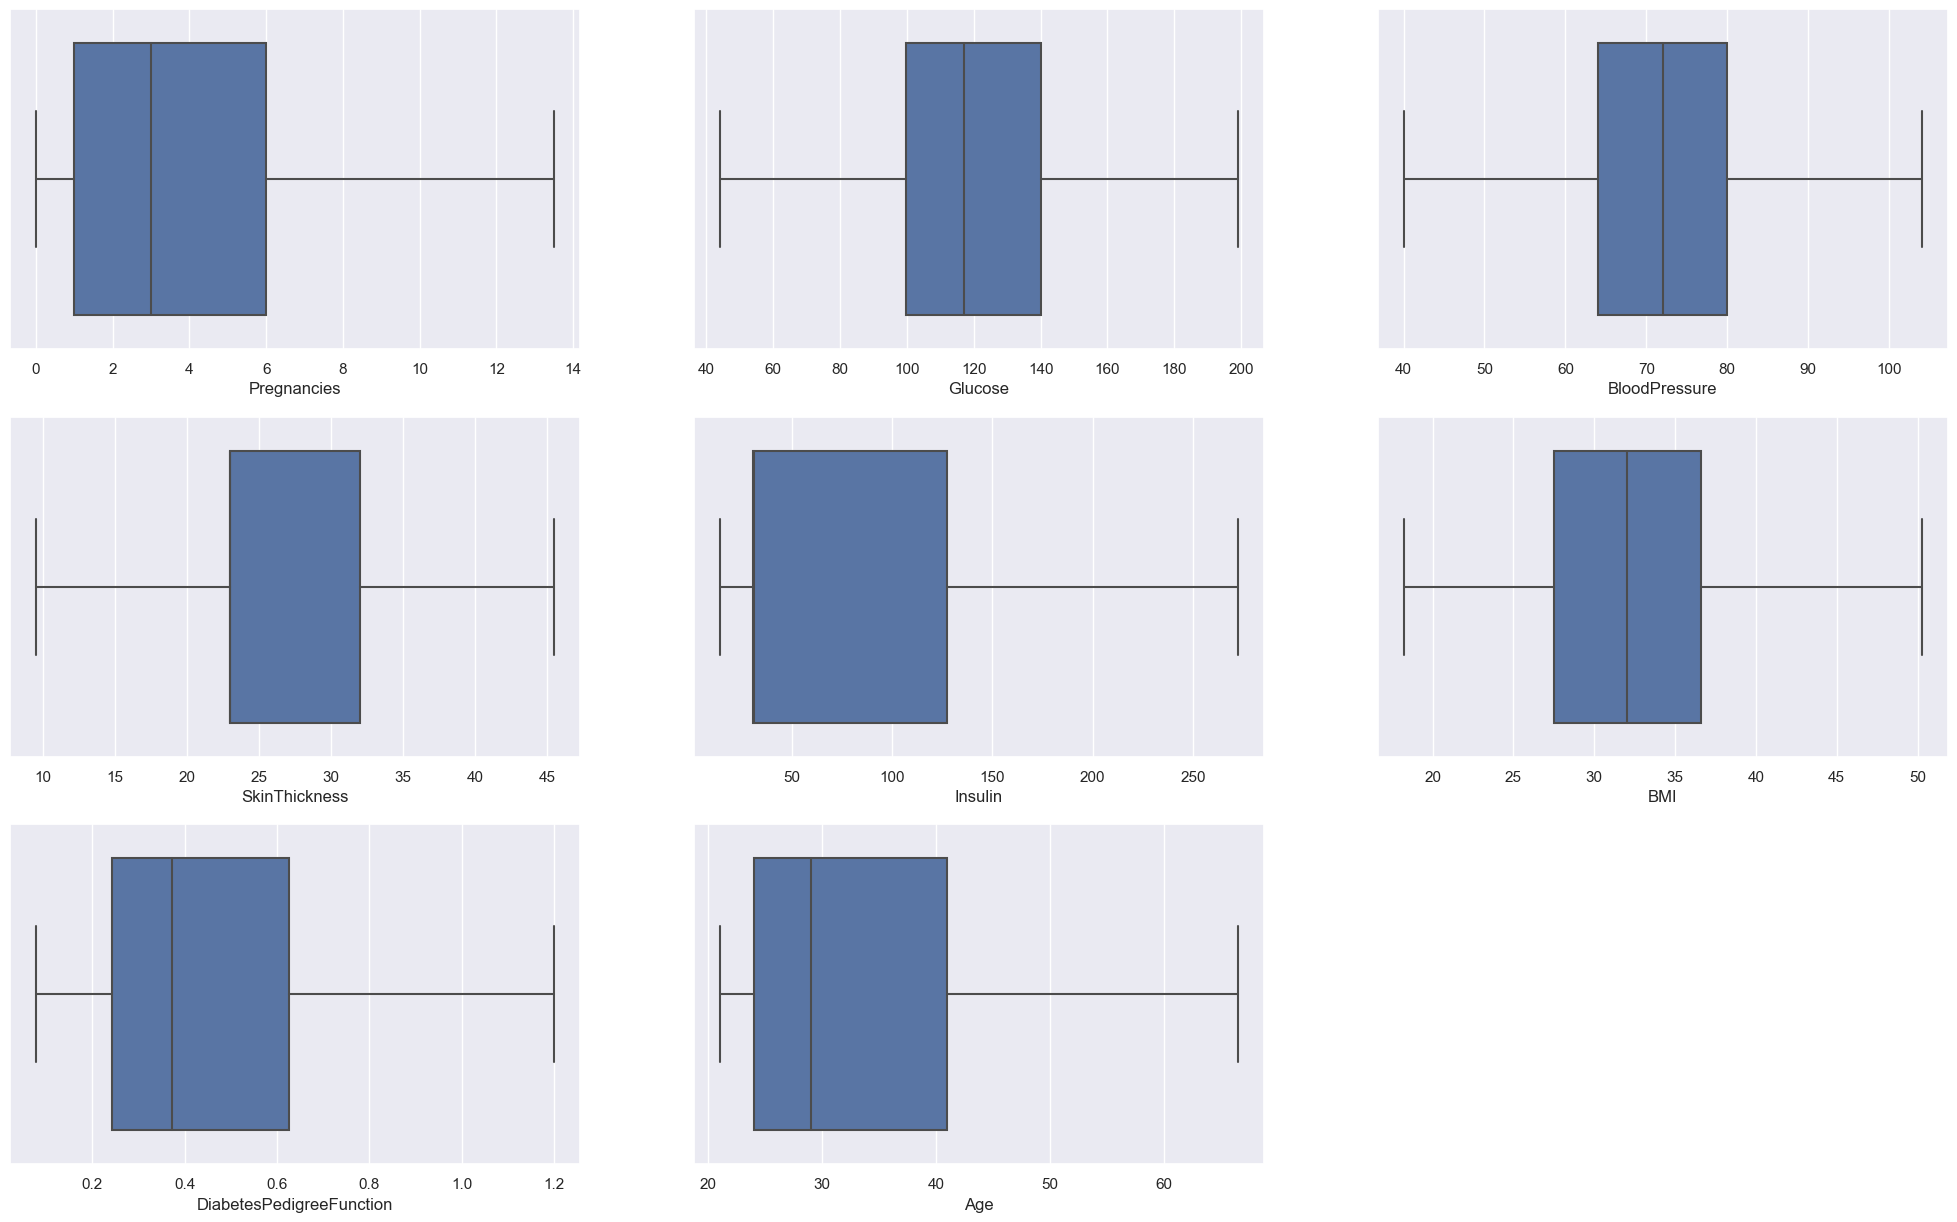

In [24]:
plt.figure(figsize = (25 , 15))

def outliers_detection_1():
    
    i = 1
    
    for col in df.columns[:-1]:
        
        plt.subplot(3 , 3 , i)
        
        sns.boxplot(data = df , x = col)
        
        i = i + 1
        
outliers_detection_1()

#### Split the data into independent variables and dependent variable

#### Independent variable

In [25]:
x = df.iloc[: , :-1]

In [26]:
x.shape

(768, 8)

In [27]:
x.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     30.5  33.6   
1          1.0     85.0           66.0           29.0     30.5  26.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0

#### Dependent variable

In [28]:
y = df.iloc[: , -1]

In [29]:
#y = pd.DataFrame(y)

In [30]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [31]:
y.shape

(768,)

### 4.Feature Scaling

In [32]:
df.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     30.5  33.6   
1          1.0     85.0           66.0           29.0     30.5  26.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0

In [33]:
scaler = StandardScaler()

In [34]:
x_scaled = scaler.fit_transform(x)

In [35]:
x_scaled = pd.DataFrame(x_scaled , columns = x.columns)

In [36]:
x_scaled.shape

(768, 8)

In [37]:
x_scaled.head(2)

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0      0.64715  0.866045      -0.030632       0.933847 -0.72982  0.181733   
1     -0.84897 -1.205066      -0.543914       0.223108 -0.72982 -0.868800   

   DiabetesPedigreeFunction       Age  
0                  0.588927  1.445691  
1                 -0.378101 -0.189304

In [38]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

### 5.Data Balacing

In [39]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [40]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Non Diabetic Percentage

In [41]:
len(df[df['Outcome'] == 0]) / len(df) * 100

65.10416666666666

### Diabetic Percentage

In [42]:
len(df[df['Outcome'] == 1]) / len(df) * 100

34.89583333333333

#### Insights : 1 means Diabetic and 0 means Non Diabetic

#### Make minor class and major class

In [43]:
major_class = len(df[df['Outcome'] == 0])
minor_class = len(df[df['Outcome'] == 1])

In [44]:
print(major_class)
print(minor_class)

500
268


In [45]:
def is_data_balance():
    
    if minor_class * 2 <= major_class:
        
        return 'Data Imabalnce'
    
    else:
        
        return 'Data Balance'
    
is_data_balance()

'Data Balance'

#### Insights : Data is Balance

#### Visualization Data Balance

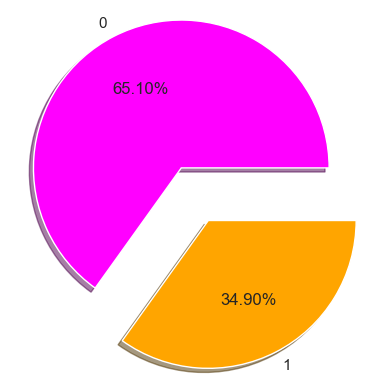

In [46]:
plt.pie(x = df['Outcome'].value_counts().values,
    explode=(0.2 , 0.2),
    labels=df['Outcome'].value_counts().index,
    colors=['magenta','orange'],
    autopct='%1.2f%%',
    shadow=True)

plt.show()

#### If we still any issue in data segregation in train and test then we will make stratify (use stratify) while train_test_split

### Data split into Train and Test

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , test_size = 0.25 , random_state = 123 , stratify = y)

In [48]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(576, 8) (192, 8) (576,) (192,)


### Now we ready for model building

### Building KNN Model

##### Before building knn model , we need to decide n_neighbors

In [49]:
#def k_value():
    
k_list = []
    
error_rate = []
    
for i in range(1 , 30):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train , y_train)
        y_train_pred_knn = knn.predict(x_train)
        y_train_pred_knn = y_train_pred_knn
        error = np.mean(y_train != y_train_pred_knn)
        error_rate.append(error)
        k_list.append(i)
        
#k_value()

In [50]:
print(error_rate)

[0.0, 0.1736111111111111, 0.1527777777777778, 0.19444444444444445, 0.19791666666666666, 0.21354166666666666, 0.19791666666666666, 0.21875, 0.19444444444444445, 0.2326388888888889, 0.21875, 0.22569444444444445, 0.21006944444444445, 0.2326388888888889, 0.21006944444444445, 0.234375, 0.22743055555555555, 0.22916666666666666, 0.2222222222222222, 0.22743055555555555, 0.21875, 0.22395833333333334, 0.21354166666666666, 0.2170138888888889, 0.22395833333333334, 0.2309027777777778, 0.21875, 0.234375, 0.2326388888888889]


In [51]:
print(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


#### Visualization of plot for decide optimize k value

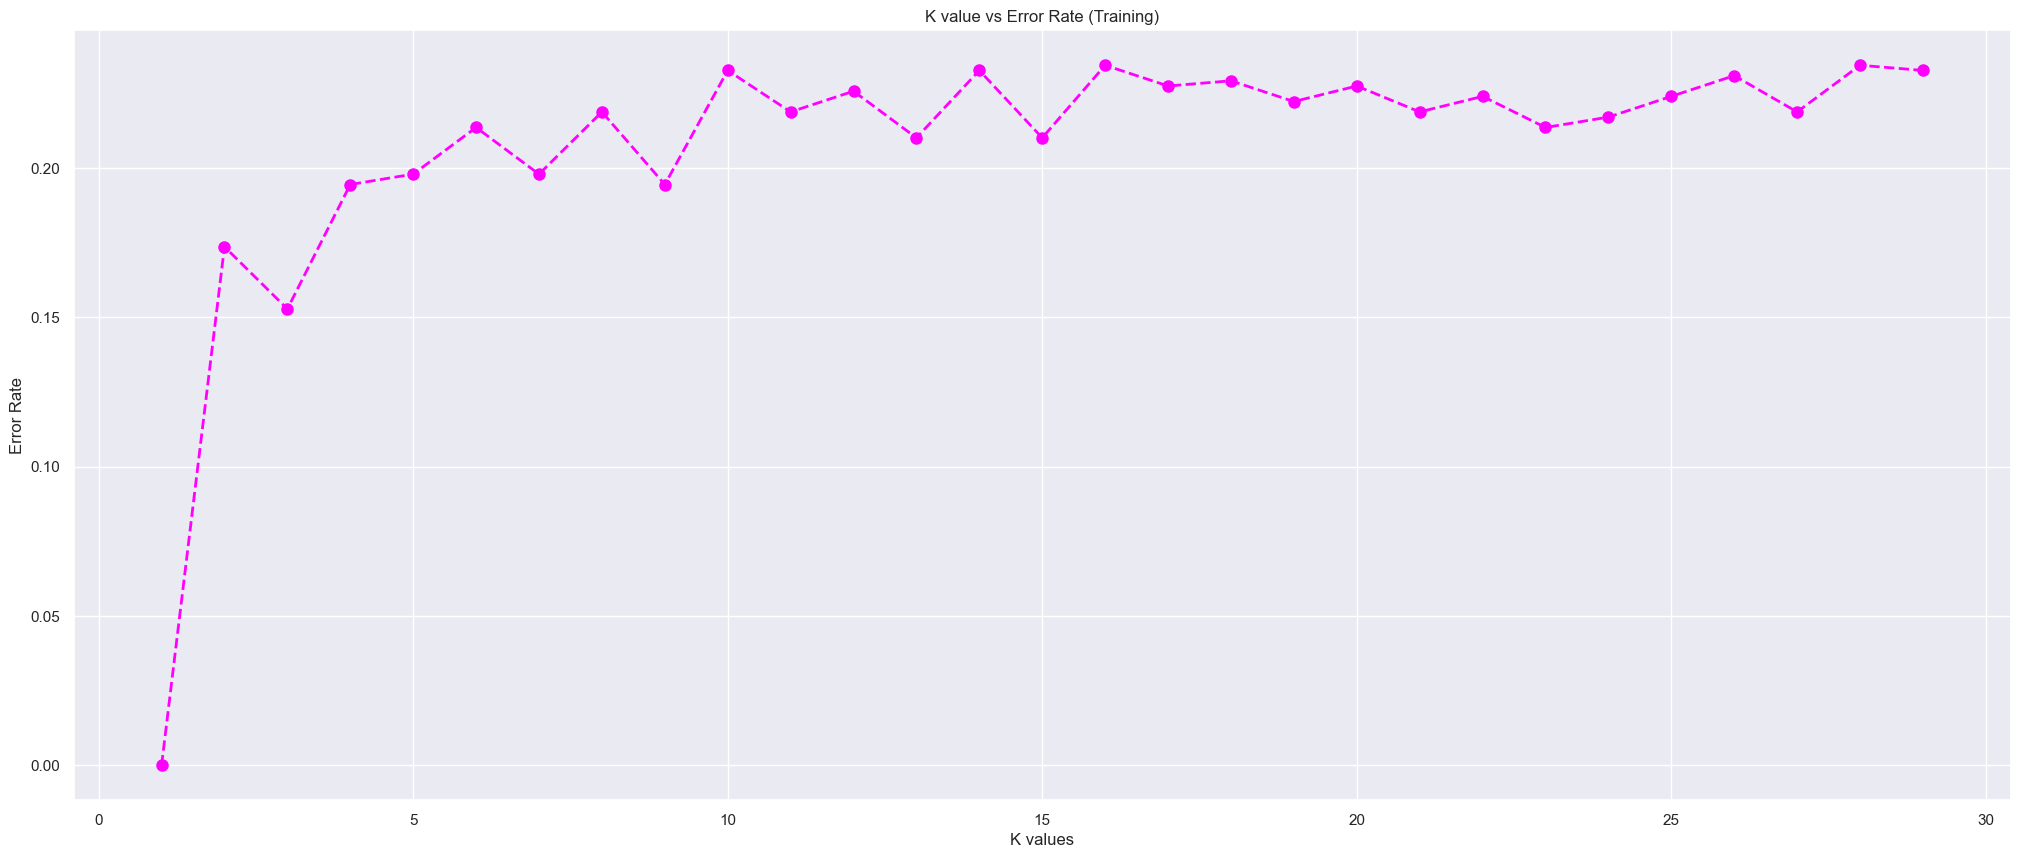

In [52]:
plt.figure(figsize = (25 , 10))
plt.plot(k_list , error_rate , color = 'magenta' , marker = 'o' , linestyle = 'dashed' , linewidth = 2 , markersize = 8)
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.title('K value vs Error Rate (Training)')
plt.show()

#### Insights : We select k value as 3. 
##### because , 
##### 1. We need to choose k value where error rate should be less / minimal . 
##### 2.The k value should be odd.

#### Build KNN Model (Training)

In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train , y_train)
y_train_pred_knn = knn.predict(x_train)
training_accuracy_knn = accuracy_score(y_train , y_train_pred_knn)
print('Training Accuracy of KNN is :' , training_accuracy_knn)

Training Accuracy of KNN is : 0.8472222222222222


#### Confusion Matrix of KNN training Model

In [54]:
confusion_matrix(y_train , y_train_pred_knn)

array([[335,  40],
       [ 48, 153]], dtype=int64)

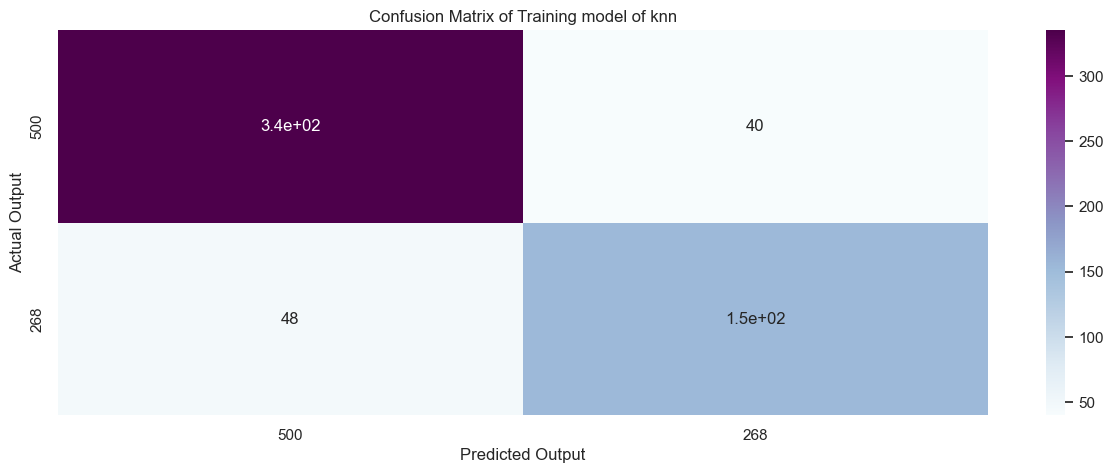

In [55]:
plt.figure(figsize = (15 , 5))
sns.heatmap(confusion_matrix(y_train , y_train_pred_knn) , cbar = True , cmap = 'BuPu', 
           annot = True,
           xticklabels = y.value_counts().values,
           yticklabels = y.value_counts().values)
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title('Confusion Matrix of Training model of knn')
plt.show()

#### Classification Report of KNN Training Model

In [56]:
print(classification_report(y_train , y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       375
           1       0.79      0.76      0.78       201

    accuracy                           0.85       576
   macro avg       0.83      0.83      0.83       576
weighted avg       0.85      0.85      0.85       576



##### Insights :  Recall : Model identifies 76 % actual positive(diabetic) and  ientifies 89 % actual negative (N-d)
#### means 76 % people are diabetic and 89 % people are non diabetic

### ROC AUC Curve KNN Training

##### ROC AUC Score

In [57]:
roc_auc_score_train_knn = roc_auc_score(y_train , y_train_pred_knn)

In [58]:
roc_auc_score_train_knn

0.8272636815920398

##### ROC  Curve

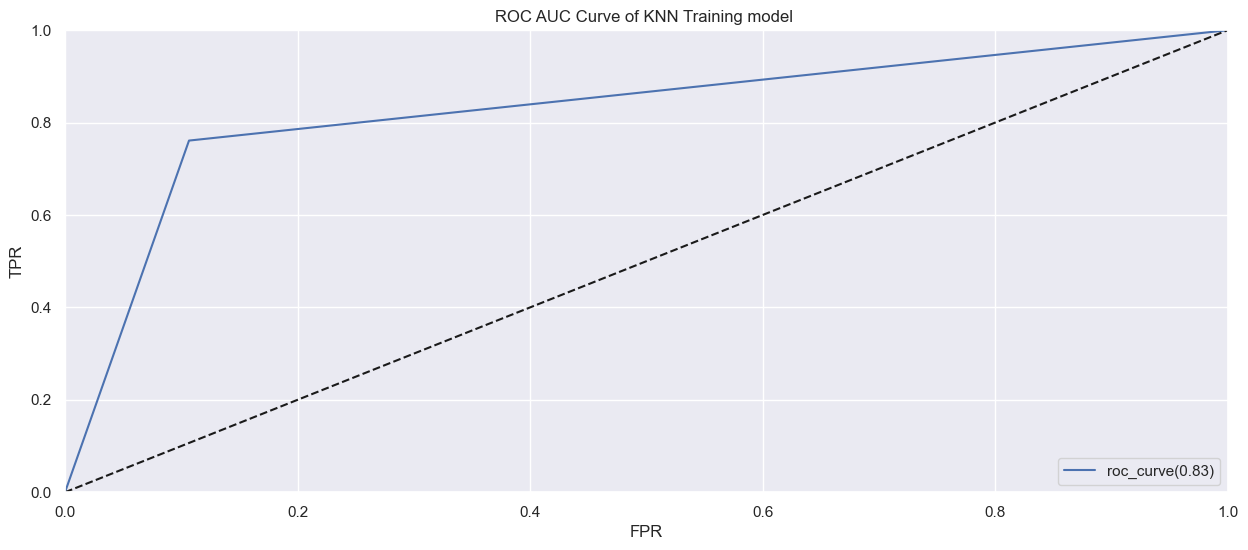

In [59]:
plt.figure(figsize = (15 , 6))
fpr , tpr , thresholds = roc_curve(y_train , y_train_pred_knn)
plt.plot(fpr , tpr , label = 'roc_curve(%1.2f)'%roc_auc_score_train_knn)
plt.plot([0, 1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve of KNN Training model ')
plt.legend(loc = 'lower right')
plt.show()

#### Build KNN Model (Testing)

In [60]:
y_test_pred_knn = knn.predict(x_test)
testing_accuracy_knn = accuracy_score(y_test , y_test_pred_knn)
print('Testing Accuracy of KNN is :' , testing_accuracy_knn)

Testing Accuracy of KNN is : 0.7552083333333334


#### Confusion Matrix of testing model of knn

In [61]:
confusion_matrix(y_test , y_test_pred_knn)

array([[110,  15],
       [ 32,  35]], dtype=int64)

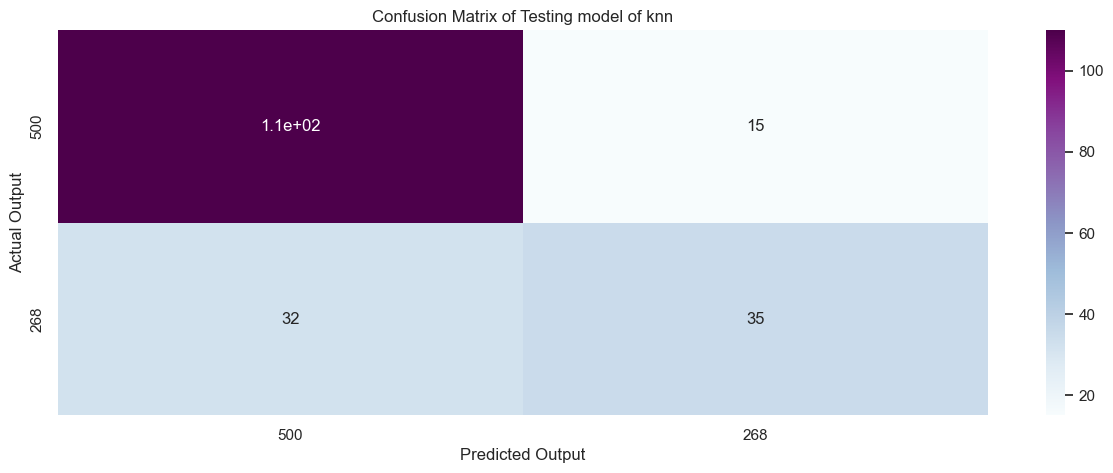

In [62]:
plt.figure(figsize = (15 , 5))
sns.heatmap(confusion_matrix(y_test , y_test_pred_knn) , cbar = True , cmap = 'BuPu', 
           annot = True,
           xticklabels = y.value_counts().values,
           yticklabels = y.value_counts().values)
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title('Confusion Matrix of Testing model of knn')
plt.show()

#### Classification Report of Testing model of knn

In [63]:
print(classification_report(y_test , y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.70      0.52      0.60        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



##### Insights : A recall of 0.52 for class 1 is relatively low. This suggests that the model is missing a significant number of people who actually have diabetes. In a medical context, where detecting as many true positive cases as possible is crucial, this might be problematic. Missing many cases could have serious implications for patient care and treatment.

#### Conclusion :  The current model has a strong ability to identify non-diabetic cases but struggles with identifying diabetic cases. For applications where detecting as many positive cases as possible is critical, like in diabetes prediction, focusing on improving the recall for class 1 should be a priority. Addressing this issue can help enhance the overall reliability and usefulness of the model.

### ROC AUC Curve KNN Testing Model

#### ROC AUC Score

In [64]:
roc_auc_score_test_knn = roc_auc_score(y_test , y_test_pred_knn)

In [65]:
roc_auc_score_test_knn

0.7011940298507463

#### ROC Curve

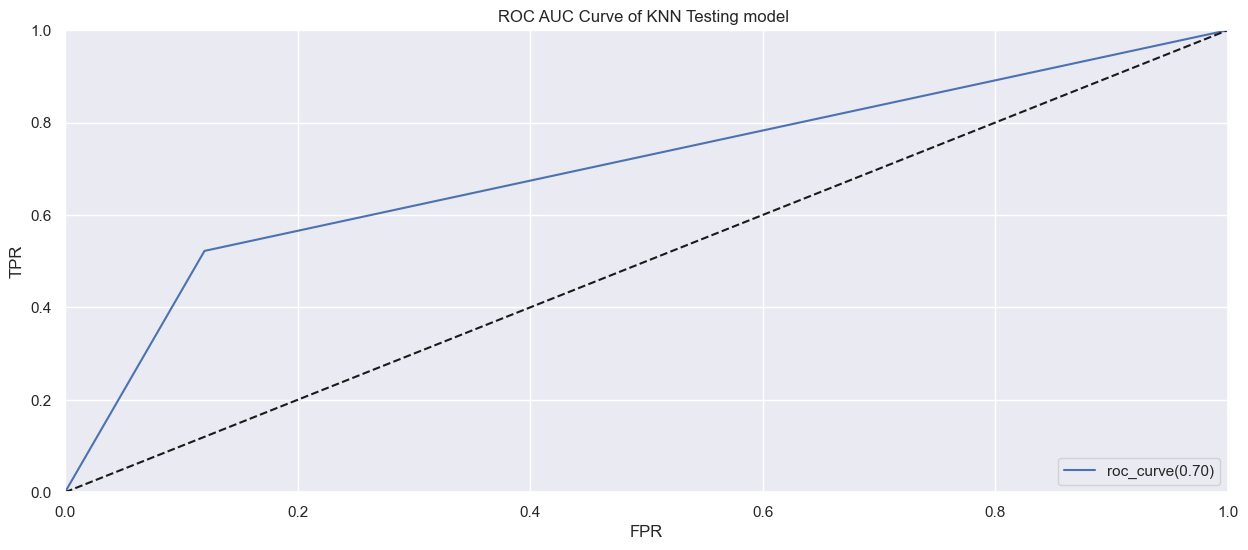

In [66]:
plt.figure(figsize = (15 , 6))
fpr , tpr , thresholds = roc_curve(y_test , y_test_pred_knn)
plt.plot(fpr , tpr , label = 'roc_curve(%1.2f)'%roc_auc_score_test_knn)
plt.plot([0, 1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve of KNN Testing model ')
plt.legend(loc = 'lower right')
plt.show()

### Building Logistic Regression

In [67]:
logit = LogisticRegression()

In [68]:
logit

LogisticRegression()

#### Fit (Train) the logistic model

In [69]:
logit.fit(x_train , y_train)

LogisticRegression()

#### Training Prediction of Logistic 

In [70]:
y_train_pred_logit = logit.predict(x_train)

In [71]:
y_train_pred_logit

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Training Accuracy of Logit

In [72]:
training_accuracy_logit = accuracy_score(y_train , y_train_pred_logit)

In [73]:
training_accuracy_logit

0.7795138888888888

#### Confusion Matrix Of Logit Training Model

In [74]:
confusion_matrix(y_train , y_train_pred_logit)

array([[334,  41],
       [ 86, 115]], dtype=int64)

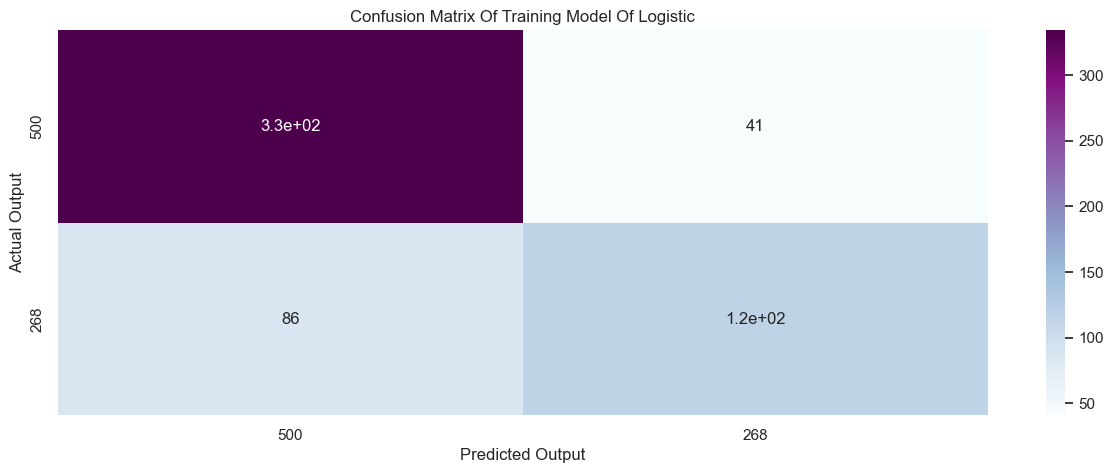

In [75]:
plt.figure(figsize = (15 , 5))
sns.heatmap(confusion_matrix(y_train , y_train_pred_logit) , cbar = True , cmap = 'BuPu', 
           annot = True,
           xticklabels = y.value_counts().values,
           yticklabels = y.value_counts().values)
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title('Confusion Matrix Of Training Model Of Logistic')
plt.show()

#### Classification Report Of Training Model of Logistic

In [76]:
print(classification_report(y_train , y_train_pred_logit))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       375
           1       0.74      0.57      0.64       201

    accuracy                           0.78       576
   macro avg       0.77      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576



### ROC AUC Curve Of Training model Of Logistic

#### ROC AUC Score

In [77]:
roc_auc_score_train_logit = roc_auc_score(y_train , y_train_pred_logit)

In [78]:
roc_auc_score_train_logit

0.7314029850746269

#### ROC Curve

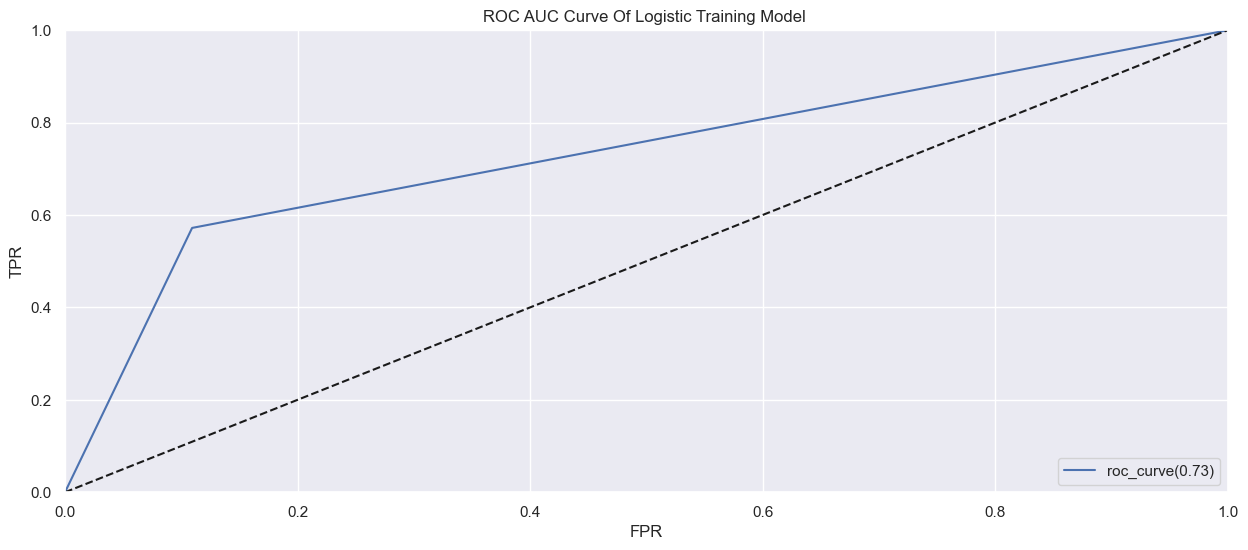

In [79]:
plt.figure(figsize = (15 , 6))
fpr , tpr , thresholds = roc_curve(y_train , y_train_pred_logit)
plt.plot(fpr , tpr , label = 'roc_curve(%1.2f)'%roc_auc_score_train_logit)
plt.plot([0, 1] , [0,1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve Of Logistic Training Model ')
plt.legend(loc = 'lower right')
plt.show()

### Testing Model Of Logistic

#### Testing Prediction Logistic model

In [80]:
y_test_pred_logit = logit.predict(x_test)

In [81]:
y_test_pred_logit

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

##### Testing accuracy of Logistic model

In [82]:
testing_accuracy_logit = accuracy_score(y_test , y_test_pred_logit)

In [83]:
testing_accuracy_logit

0.75

#### Confusion Matrix Of Logit Testing Model

In [84]:
confusion_matrix(y_test , y_test_pred_logit)

array([[111,  14],
       [ 34,  33]], dtype=int64)

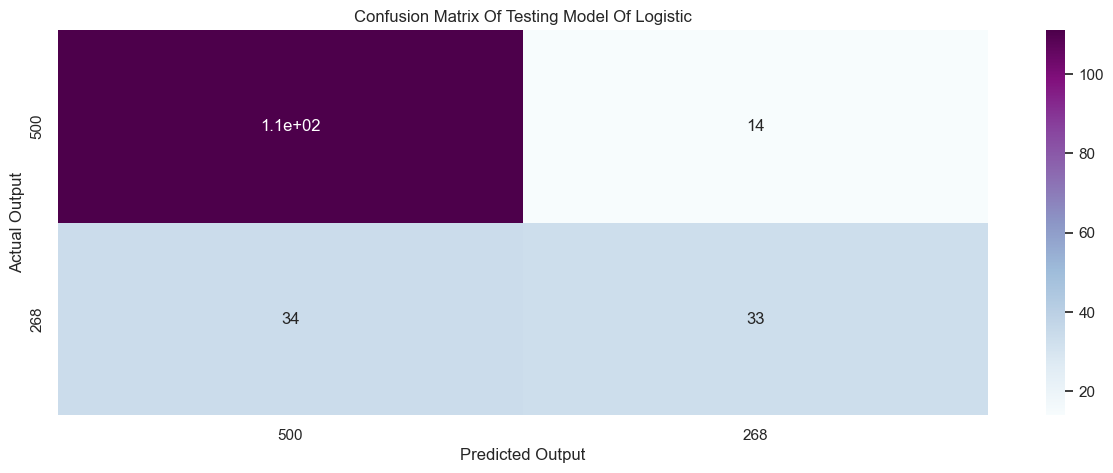

In [85]:
plt.figure(figsize = (15 , 5))
sns.heatmap(confusion_matrix(y_test , y_test_pred_logit) , cbar = True , cmap = 'BuPu', 
           annot = True,
           xticklabels = y.value_counts().values,
           yticklabels = y.value_counts().values)
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title('Confusion Matrix Of Testing Model Of Logistic')
plt.show()

#### Classification Report Of Training Model of Logistic

In [86]:
print(classification_report(y_test , y_test_pred_logit))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       125
           1       0.70      0.49      0.58        67

    accuracy                           0.75       192
   macro avg       0.73      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



### ROC AUC Curve Of Testing Model Of Logistic

#### ROC Score

In [87]:
roc_auc_score_test_logit = roc_auc_score(y_test , y_test_pred_logit)

In [88]:
roc_auc_score_test_logit

0.6902686567164179

#### ROC Curve

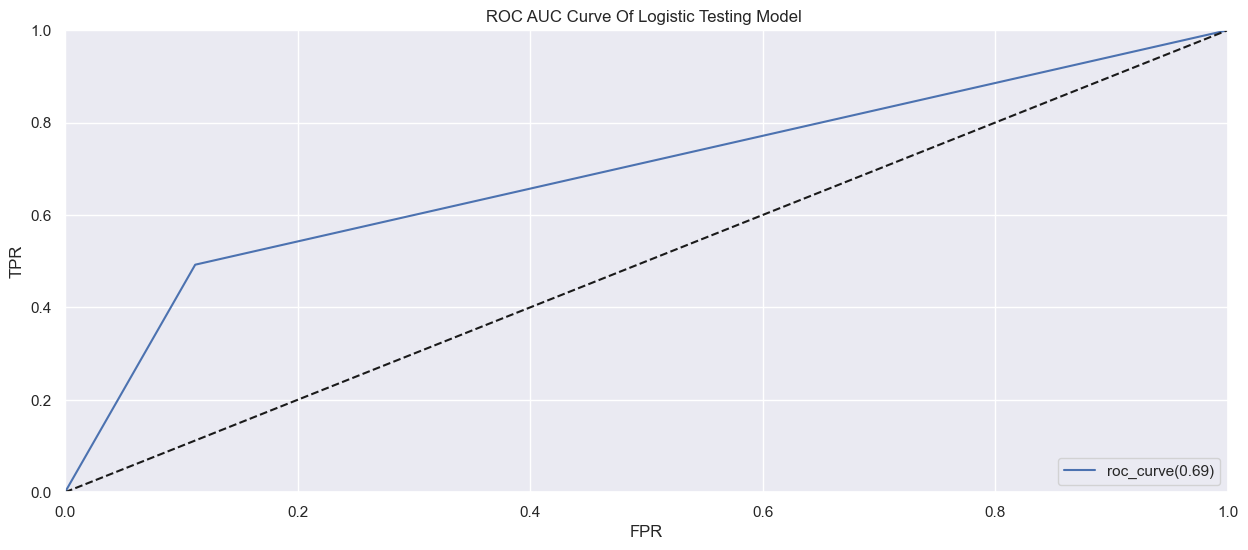

In [89]:
plt.figure(figsize = (15 , 6))
fpr , tpr , thresholds = roc_curve(y_test , y_test_pred_logit)
plt.plot(fpr , tpr , label = 'roc_curve(%1.2f)'%roc_auc_score_test_logit)
plt.plot([0, 1] , [0, 1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve Of Logistic Testing Model ')
plt.legend(loc = 'lower right')
plt.show()

### StackingClassifier

In [90]:
estimator = [('Logistic' , LogisticRegression()), 
              ('DecisionTree' , DecisionTreeClassifier()) , ('RandomForest',RandomForestClassifier()),
             ('Bagging'  , BaggingClassifier()) , ('AdaBoost' , AdaBoostClassifier()) ,
              ('GradientBoosting' , GradientBoostingClassifier()),
              ('KNN' , KNeighborsClassifier()) ,
              ('Naive Bayes' , BernoulliNB()),  ('SVM' , svm.SVC())]

In [91]:
estimator

[('Logistic', LogisticRegression()),
 ('DecisionTree', DecisionTreeClassifier()),
 ('RandomForest', RandomForestClassifier()),
 ('Bagging', BaggingClassifier()),
 ('AdaBoost', AdaBoostClassifier()),
 ('GradientBoosting', GradientBoostingClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('Naive Bayes', BernoulliNB()),
 ('SVM', SVC())]

#### Avg Accuracy Of Models

In [92]:
def avg_accuracy():
    
    for model in estimator:
        
        accuracy_score = cross_val_score(model[1] , x_train , y_train , scoring = 'accuracy')
        
        print(model[0]  , ':' ,  np.mean(accuracy_score))
    
avg_accuracy()

Logistic : 0.7743028485757121
DecisionTree : 0.6701799100449775
RandomForest : 0.7396101949025488
Bagging : 0.7396251874062969
AdaBoost : 0.7204947526236882
GradientBoosting : 0.7482908545727136
KNN : 0.7187706146926537
Naive Bayes : 0.7047976011994004
SVM : 0.7551874062968515


##### Insights : We get some results , but for stackingClassifier we need results probabily greater
#####            than 70 % . those we not get it . so we will try for VotingClassifier

### VotingClassifier

In [93]:
voting = VotingClassifier(estimators = estimator  , voting = 'hard')

In [94]:
voting

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('DecisionTree', DecisionTreeClassifier()),
                             ('RandomForest', RandomForestClassifier()),
                             ('Bagging', BaggingClassifier()),
                             ('AdaBoost', AdaBoostClassifier()),
                             ('GradientBoosting', GradientBoostingClassifier()),
                             ('KNN', KNeighborsClassifier()),
                             ('Naive Bayes', BernoulliNB()), ('SVM', SVC())])

#### Build Training Model

In [95]:
voting.fit(x_train , y_train)
y_train_pred_voting = voting.predict(x_train)
training_accuracy_voting = accuracy_score(y_train , y_train_pred_voting)
print('Training Accuracy Of Voting :' , training_accuracy_voting)

Training Accuracy Of Voting : 0.9114583333333334


#### Confusion Matrix VotingClassifier Training

In [96]:
confusion_matrix(y_train , y_train_pred_voting)

array([[360,  15],
       [ 36, 165]], dtype=int64)

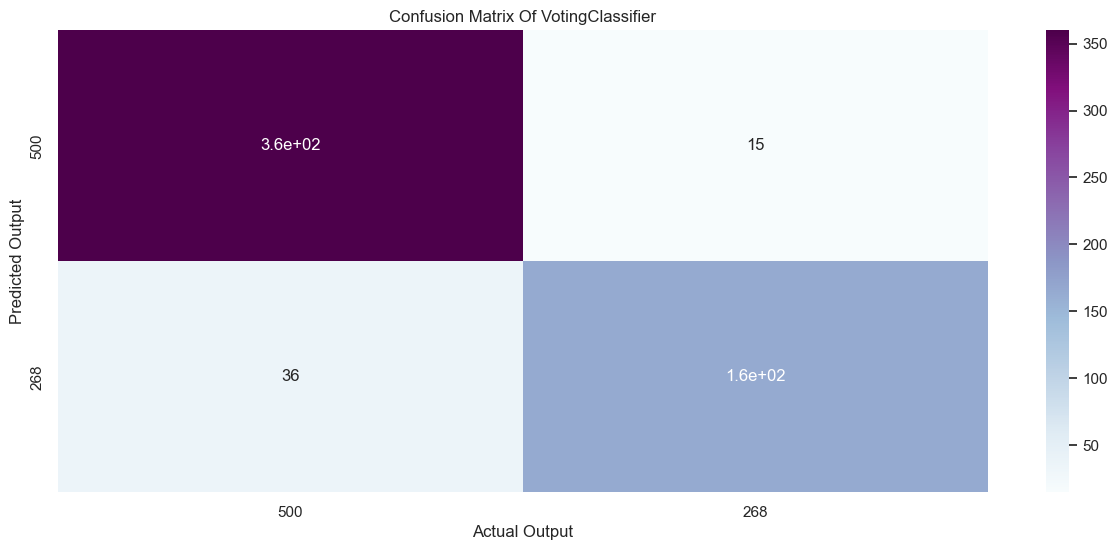

In [97]:
plt.figure(figsize = (15 , 6))
sns.heatmap(confusion_matrix(y_train , y_train_pred_voting) , cbar = True , cmap = 'BuPu',
            annot = True,
           xticklabels = y.value_counts().values , 
           yticklabels = y.value_counts().values)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Confusion Matrix Of VotingClassifier')
plt.show()

#### Classification Report VotingClassifier Training

In [98]:
print(classification_report(y_train , y_train_pred_voting))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       375
           1       0.92      0.82      0.87       201

    accuracy                           0.91       576
   macro avg       0.91      0.89      0.90       576
weighted avg       0.91      0.91      0.91       576



#### Insights : Recall : model identies 96 % negatives (Non Diabetic)
####                                model identifies 81 % positive (Diabetic)

### ROC AUC Curve VotingClassifier Training

#### ROC AUC Score

In [99]:
roc_auc_score_training_voting = roc_auc_score(y_train , y_train_pred_voting)

In [100]:
roc_auc_score_training_voting

0.8904477611940298

#### ROC Curve

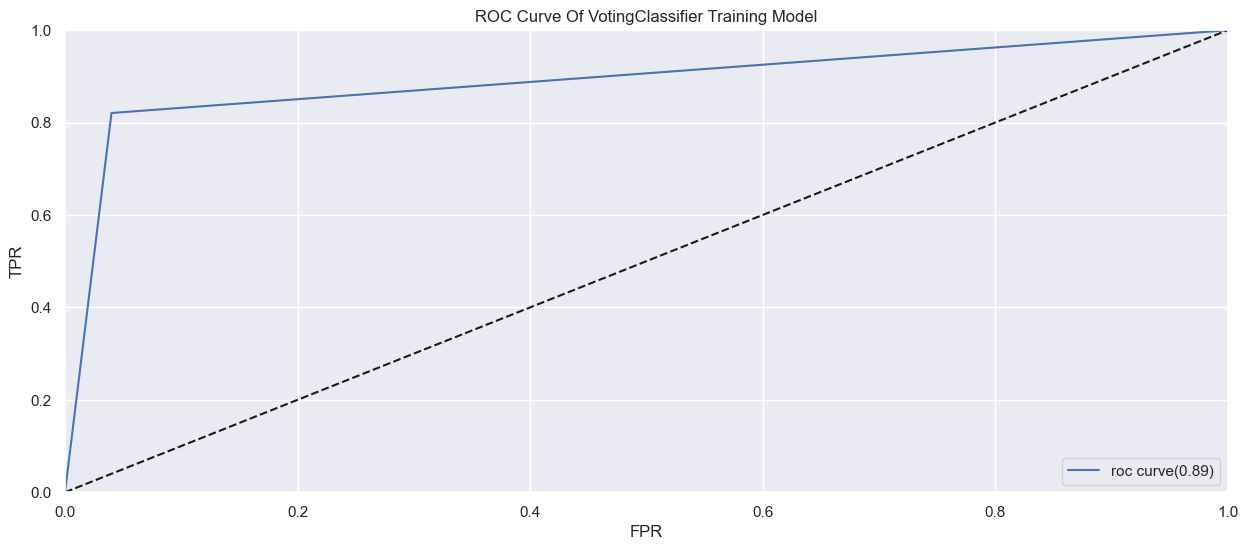

In [124]:
plt.figure(figsize = (15 , 6))
fpr , tpr , thresholds = roc_curve(y_train , y_train_pred_voting)
plt.plot(fpr ,  tpr , label= 'roc curve(%1.2f)' % roc_auc_score_training_voting)
plt.plot([0 , 1] , [0 , 1] , 'k--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0 , 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve Of VotingClassifier Training Model')
plt.legend(loc = 'lower right')
plt.show()

#### Testing model of votingClassifier

In [105]:
y_test_pred_voting = voting.predict(x_test)
testing_accuracy_voting = accuracy_score(y_test , y_test_pred_voting)
print('Testing Accuracy of voting :' , testing_accuracy_voting)

Testing Accuracy of voting : 0.7760416666666666


#### VotingClassifier get overfitted

#### From above three models KNN , Logistic and VotingClassifier , KNN is quite best from among three models

#### Picking

##### Pickle the file

In [121]:
pickle.dump(obj = knn , file = open('knn.pkl' , 'wb'))

##### Unpickle the file

In [122]:
model_knn = pickle.load(file = open('knn.pkl' , 'rb'))

In [123]:
model_knn

KNeighborsClassifier(n_neighbors=3)